In [1]:
#import necessary libraries
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,accuracy_score,precision_recall_curve,confusion_matrix
from sklearn.feature_selection import RFE

#import warning library
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)


## <a> 1. Data Reading and Understanding

In [2]:
#importing the data
df = pd.read_csv('C:/Users/tusha/Downloads/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv')

In [3]:
#checking top few rows
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#checking the number of rows and columns
df.shape

(9240, 37)

In [5]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<a> We can observe that there are a few columns that need data type correction.<a>

In [6]:
#checking for the duplicates
df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


<a> We obsereve that there are no duplicates in our dataset.

In [7]:
#checking the spread of the data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
df.describe(include = ['object'])

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


<a> It is observed that many columns have just one unique value(approx b/w 1-10 fpr most). Hence, these columns do not provide any help in identifying Hot leads.

## <a> 2. Data Cleaning

#### a) Handling Delimiters

In [9]:
# Handling the delimiters
df['Asymmetrique Activity Index'] = df["Asymmetrique Activity Index"].fillna('').str.split(".").str[1]
df['Asymmetrique Profile Index'] = df["Asymmetrique Profile Index"].fillna('').str.split(".").str[1]
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,Medium,Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,Medium,Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,Medium,High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,Medium,High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,Medium,High,15.0,18.0,No,No,Modified


#### b) Dropping unnecessary columns

In [10]:
# Dropping columns that have only one unique value for all the leads
cols = []
for i in df.columns:
    if df[i].nunique() ==1:
        cols.append(i)
df.drop(cols, axis =1,inplace = True)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,Medium,Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,Medium,Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,Medium,High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,Medium,High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,Medium,High,15.0,18.0,No,Modified


In [11]:
# Dropping Prospect ID as it is just indicative of the ID number of the Contacted People.
# We will keep Lead Number for identification of the lead.

df = df.drop(['Prospect ID'], axis=1)
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,Medium,Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,Medium,Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,Medium,High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,Medium,High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,Medium,High,15.0,18.0,No,Modified


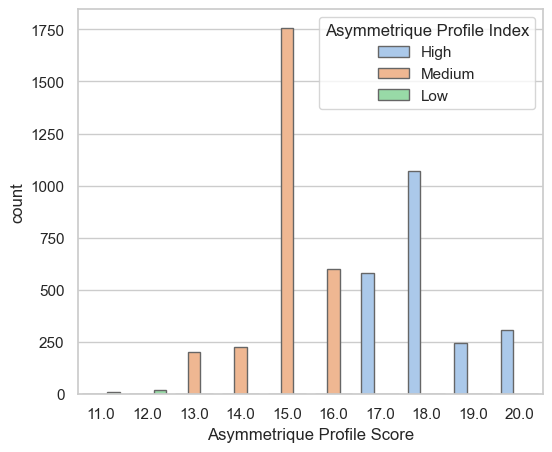

In [12]:
## Index and score assigned to each customer based on their profile
plt.figure(figsize = (6,5))
sns.countplot(x = 'Asymmetrique Profile Score', hue ='Asymmetrique Profile Index',data = df, palette="pastel", edgecolor=".4",hue_order=['High','Medium','Low'])
plt.show()

<a> From the above plot, we can observe the following points:
 - Leads with `Asymmetrique Profile Score` of 11 & 12 fall in the category of `Low` Asymmetrique Profile Index.
 - Leads with `Asymmetrique Profile Score` of 13,14,15 & 16 fall in the category of `Medium` Asymmetrique Profile Index.
 - Leads with `Asymmetrique Profile Score` of 17,18,19 & 20 fall in the category of `High` Asymmetrique Profile Index.

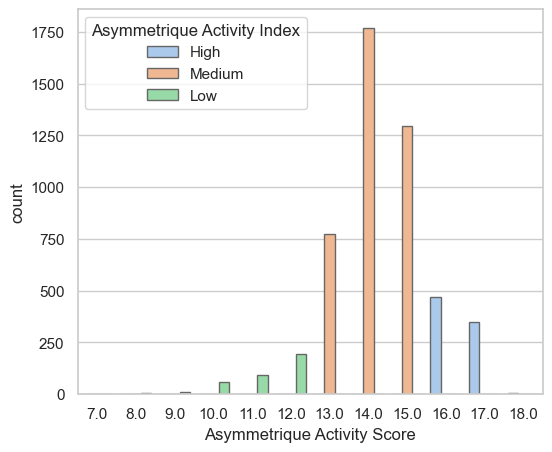

In [13]:
## Index and score assigned to each customer based on their activity
plt.figure(figsize = (6,5))
sns.countplot(x = 'Asymmetrique Activity Score', hue ='Asymmetrique Activity Index',data = df, palette="pastel", edgecolor=".4",hue_order=['High','Medium','Low'])
plt.show()

<a> From the above plot, we can observe the following points:
 - Leads with `Asymmetrique Activity Score` from 7 to 12 fall in the category of ` Low` Asymmetrique Activity Index.
 - Leads with `Asymmetrique Activity Score` of 13,14 & 15 fall in the category of `Medium` Asymmetrique Activity Index.
 - Leads with `Asymmetrique Activity Score` of 16,17 & 18 fall in the category of `High` Asymmetrique Activity Index.

<a> From the above plots, we observed that columns 'Asymmetrique Profile Score' & 'Asymmetrique Activity Score` are well described by two other columns -`Asymmetrique Profile Index' & 'Asymmetrique Activity Index' respectively. Hence these two columns can be removed from our dataset.

In [14]:
# Dropping 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score'
cols = ['Asymmetrique Activity Score','Asymmetrique Profile Score']
df.drop(cols, axis = 1, inplace = True)

In [15]:
df.shape

(9240, 29)

#### c) Dealing with uncertain values of the Leads<br>

We can observe that our dataset has many columns who have values as 'Select'. This is because customer did not select any option from the list. It might be left unselected due to the below two reasons:<br>
 - The choice of options was not sufficient and hence the ambiguity. So this can be imputed as `Others`
 - There is a mistake in the data entry. It is preferred to impute them as `NaN` as imputing them with any other value will disturb the data

In [16]:
# Columns having select values
df.columns[df.isin(['Select']).any()]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

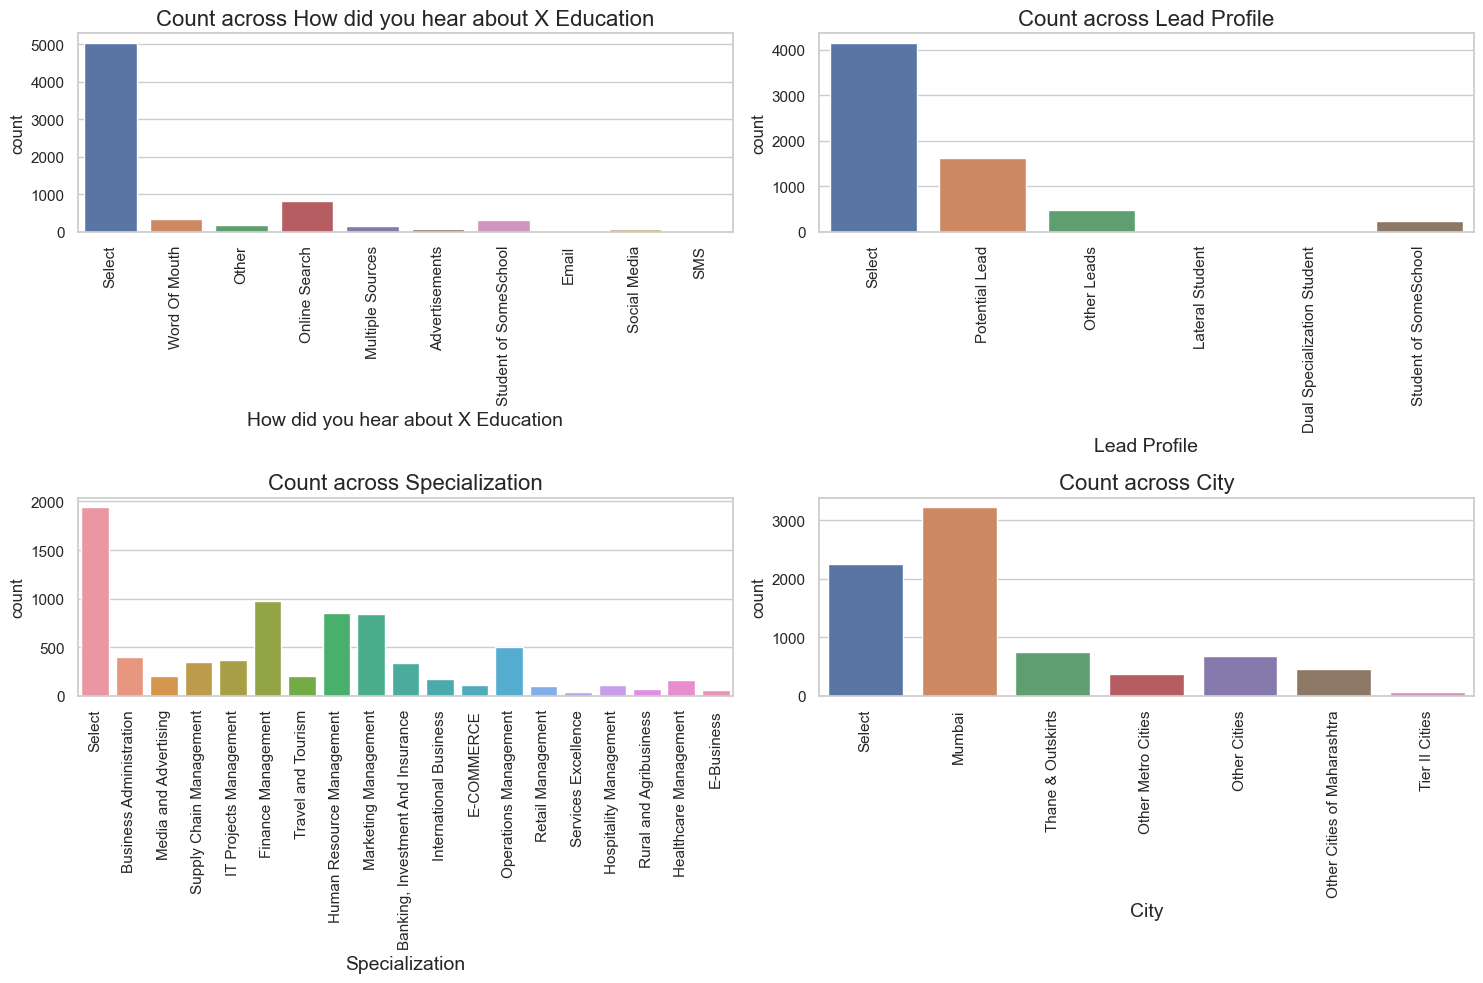

In [17]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(data=df, x=x)
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)
countplot('City',4)

plt.tight_layout()

<a> These plots show the count of unique values across each of the four columns. We can observe that in almost all the four columns, `select` category has the maximum counts(second highest in City). Let us impute this `Select` value for each column.

In [18]:
# Consider Specialization column
df['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [19]:
# Since we are unsure about specialization for many leads, imputing them wrongly will hamper the data. 
# Let us impute them with NaN values
df['Specialization'] = df['Specialization'].replace('Select', np.nan)

In [20]:
# Consider `How did you hear about X Education` column
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [21]:
# Since we are unsure about their answer, let us impute `Select` value by `NaN`. 
# Imputing them with some other values can divert the focus of efforts to be employed for improving the business
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select',np.nan)

In [22]:
# Consider `City` column
df['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [23]:
# Since we are unsure about their city, let us impute `Select` value by `NaN`.
# Any wrong imputation will lead to focusing on wrong cities
df['City']= df['City'].replace('Select',np.nan)

In [24]:
# Consider `Lead Profile` column
df['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [25]:
# Since we are unsure about their lead profile, let us impute `select` value by `NaN`.
# Any wrong imputation will lead to focusing on wrong leads
df['Lead Profile']= df['Lead Profile'].replace('Select',np.nan)

#### d) Checking for Missing values

In [26]:
#checking for null values
df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [27]:
#checking for percentage of missng values
round((df.isnull().sum()/len(df.index) *100),2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Digital Advertisement                             0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Lead Numbe

<A> We can observe that there are many missing values in the dataset. Columns with more than 40% missing data does not prove to be helpful in describing the lead. So let's drop them. We can handle the remaining missing values by either imputing them by mean or mode.

In [28]:
#Dropping the columns which have more than 40% missing values
df.drop(df.loc[:,list(round((df.isnull().sum()/len(df.index)*100),2)>40)].columns,axis =1, inplace = True)

In [29]:
#checking if there any rows which have more than 40% missing values
df[df.isnull().sum(axis = 1) > 14]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity


In [30]:
df.shape

(9240, 24)

#### d) Imputing Null Values

In [31]:
#checking for percentage of missing values
round((df.isnull().sum()/len(df.index) *100),2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Number                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Lead Origi

Columns having missing values :

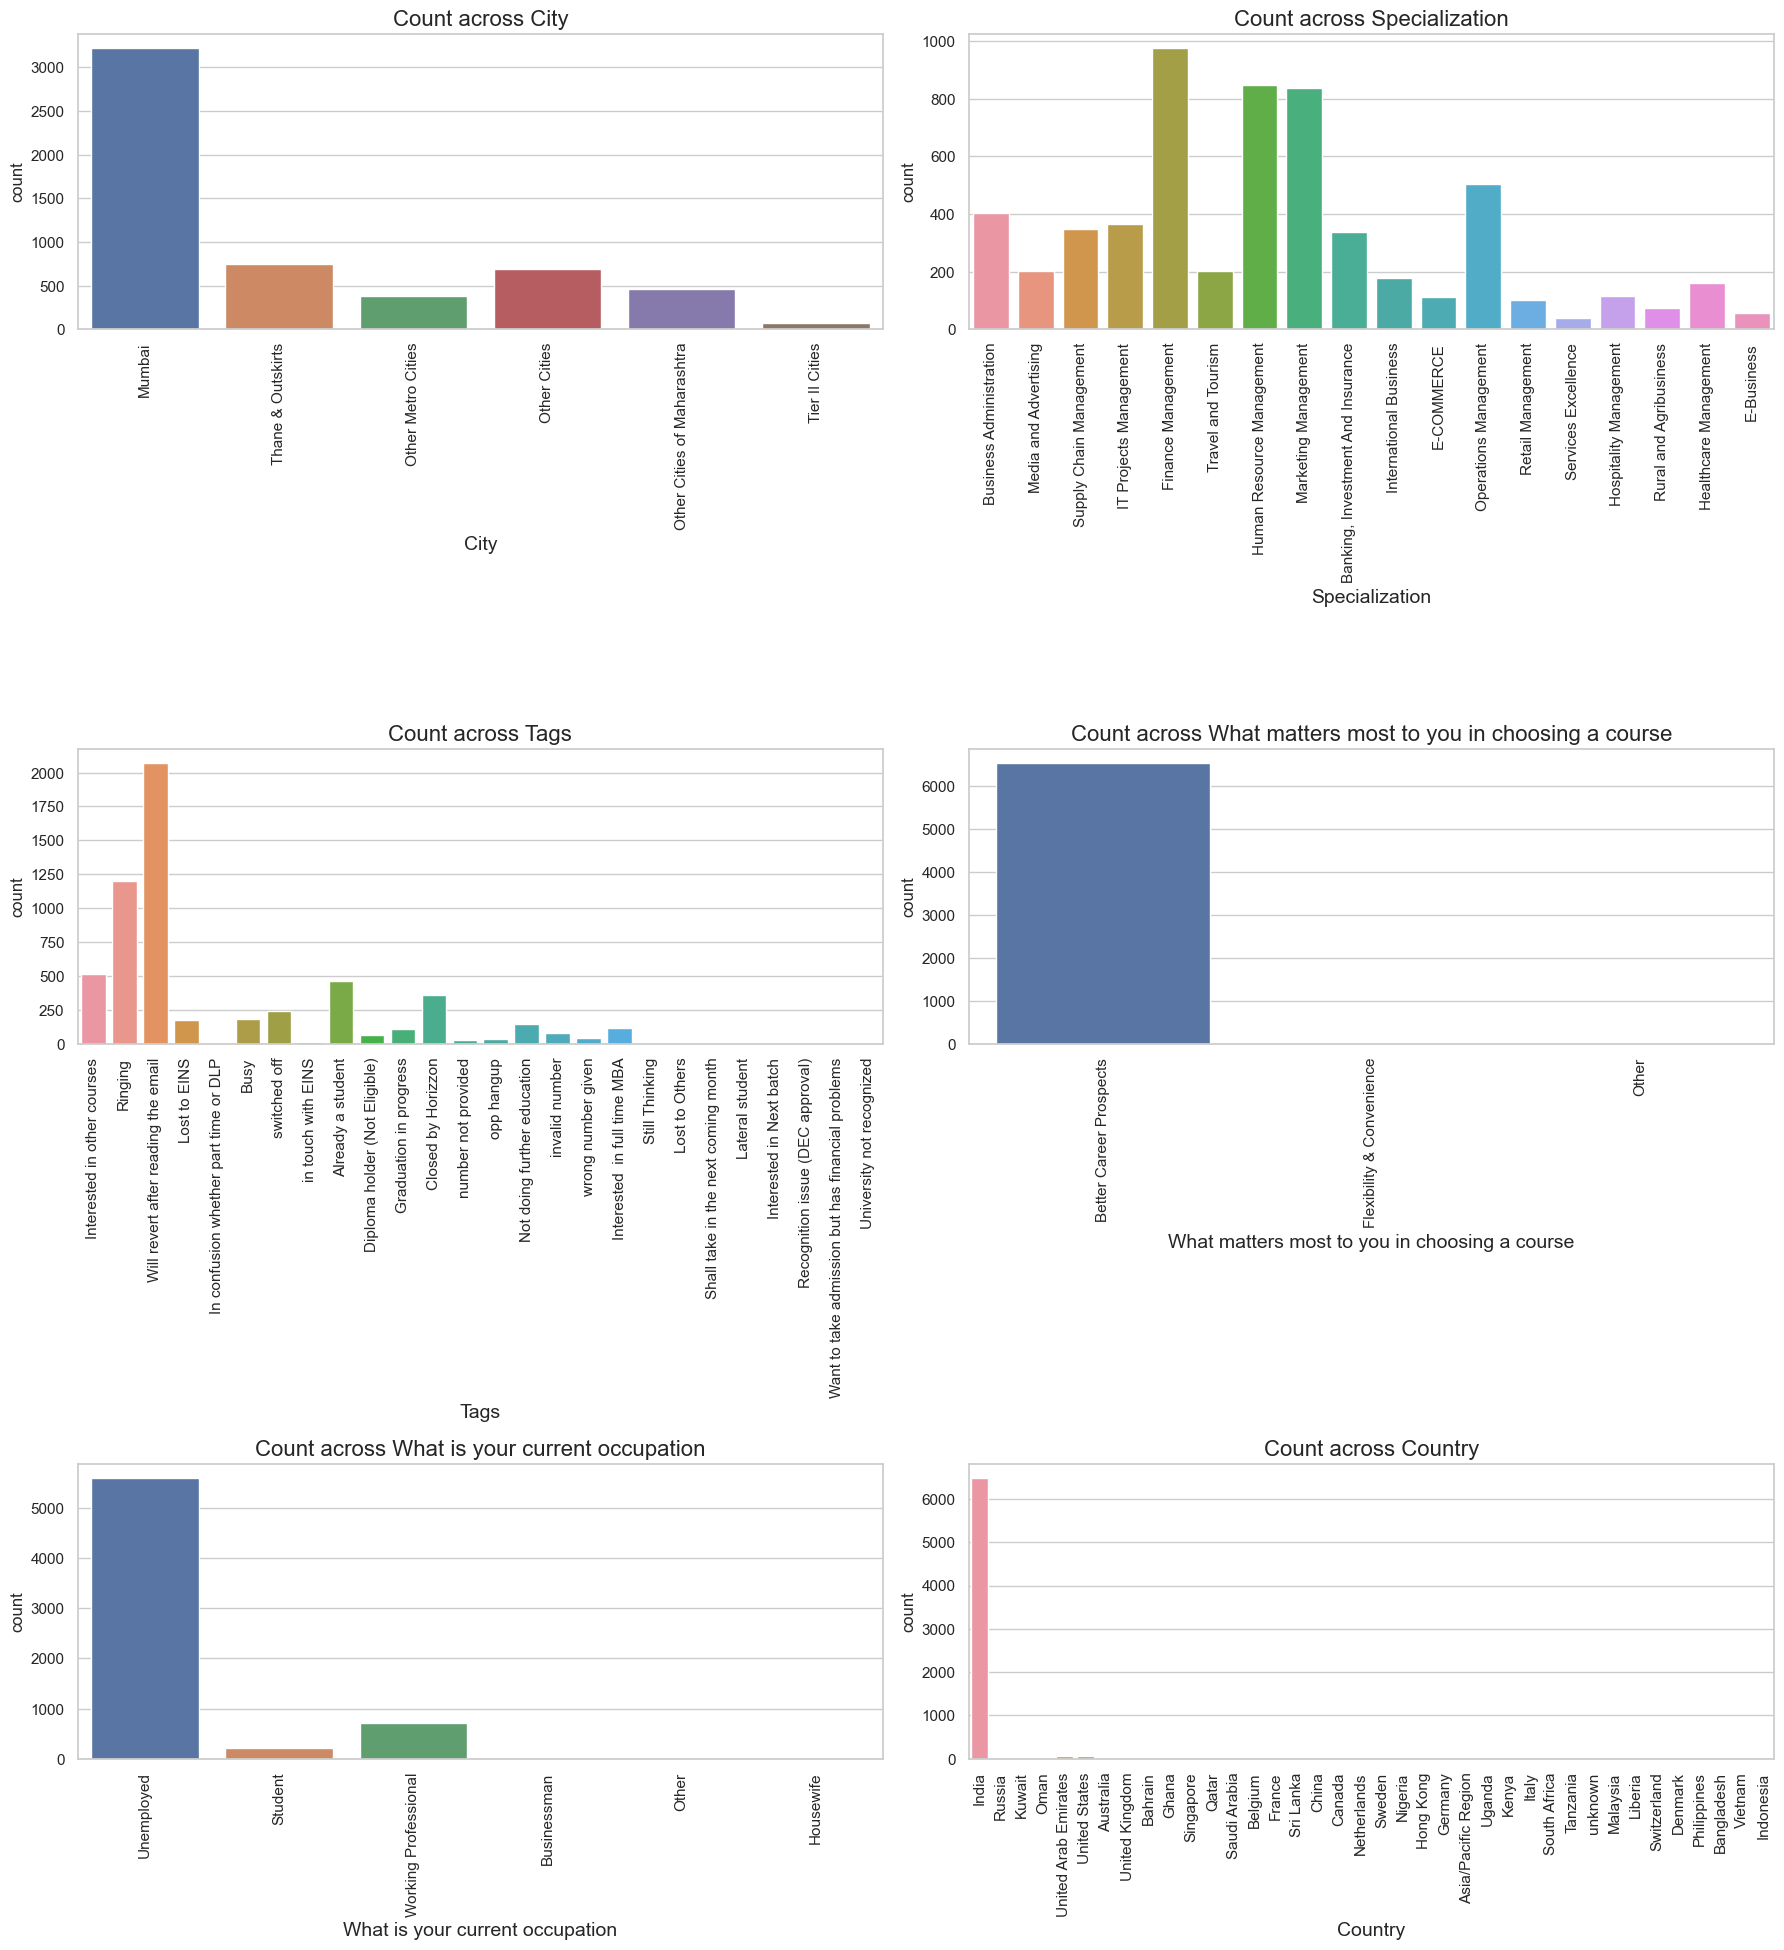

In [32]:
def countplot(x, fig):
    plt.subplot(4,2, fig)
    sns.countplot(data=df, x=x)
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(18,25))


countplot('City',1)
countplot('Specialization',2)
countplot('Tags',3)
countplot('What matters most to you in choosing a course',4)
countplot('What is your current occupation',5)
countplot('Country',6)


plt.tight_layout()

###  <a>**Inferences:**
<a>
        
 - From the count plot of `City`, we can see that the maximum leads are from `Mumbai`.
 - For most of the leads, having `Better Career Prospects`, matters the most while choosing a course. 
 - Maximum number of leads are currently `Unemployed` when it comes to current occupation.

 - Majority of the leads are `Specialized` in `Finance Management`, followed by Human Resource Management & Marketing Management. <br>
 - Majority of the leads are from `India`.
 - Majority of the leads are the customers tagged as -`will revert after reading the email`.

In [33]:
#checking value counts of "City" column
df['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [34]:
print("Before Imputing the 'City' Column, No. of Missing values is :",df['City'].isnull().sum())
df['City'].fillna(df.City.mode()[0],inplace = True)
print("After Imputing the 'City' Column, No. of Missing values is :",df['City'].isnull().sum())

Before Imputing the 'City' Column, No. of Missing values is : 3669
After Imputing the 'City' Column, No. of Missing values is : 0


In [35]:
#checking value counts of "What matters most to you in choosing a course" column
df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [36]:
#Since most of the customers choose Better Career Prospects assuming the NaN's to be the same, thus choosing mode imputation
print("Before Imputing 'What matters most to you in choosing a course' Column, No. of Missing values is :",df['What matters most to you in choosing a course'].isnull().sum())
df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0],inplace = True)
print("After Imputing 'What matters most to you in choosing a course' Column, No. of Missing values is :",df['What matters most to you in choosing a course'].isnull().sum())

Before Imputing 'What matters most to you in choosing a course' Column, No. of Missing values is : 2709
After Imputing 'What matters most to you in choosing a course' Column, No. of Missing values is : 0


In [37]:
#checking value counts of "What is your current occupation" column
df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [38]:
#Since the occupation is not known and the data is related to the educational course, 
#thus we can assume that most of them will be unemployed. Thus choosing mode imputation
print("Before Imputing 'What is your current occupation' Column, No. of Missing values is :",df['What is your current occupation'].isnull().sum())
df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0],inplace = True)

print("After Imputing 'What is your current occupation' Column, No. of Missing values is :",df['What is your current occupation'].isnull().sum())

Before Imputing 'What is your current occupation' Column, No. of Missing values is : 2690
After Imputing 'What is your current occupation' Column, No. of Missing values is : 0


In [39]:
df['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

#### e) Let us group similar specializations in one category to gain more meaningful insights

In [40]:
# Let us group all the management specializations in one category called 'Management'
manage = ['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management']
df['Specialization'] = df['Specialization'].replace(manage,'Management')

# Let us replace 'E-COMMERCE' specializations by'E-Business' as E-COMMERCE is a subset of E-Business
df['Specialization'] = df['Specialization'].replace('E-COMMERCE','E-Business')

In [41]:
df['Specialization'].value_counts(dropna=False)

Specialization
Management                           4253
NaN                                  3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-Business                            169
Rural and Agribusiness                 73
Services Excellence                    40
Name: count, dtype: int64

In [42]:
#Since specialization is something which was not present as an option when the data was collected, 
#and we cannot blindly impute it with mode. Thus we decide to make a new category as 'Others'
print("Before Imputing Specialization Column, No. of Missing values is :",df['Specialization'].isnull().sum())
df['Specialization'] = df['Specialization'].replace(np.nan,'Others')
print("After Imputing Specialization Column, No. of Missing values is :",df['Specialization'].isnull().sum())

Before Imputing Specialization Column, No. of Missing values is : 3380
After Imputing Specialization Column, No. of Missing values is : 0


In [43]:
#Let us now see the null percentage for all columns
round((df.isnull().sum()/len(df.index) *100),2).sort_values(ascending = False).head()

Tags                    36.29
Country                 26.63
TotalVisits              1.48
Page Views Per Visit     1.48
Last Activity            1.11
dtype: float64

In [44]:
df['Tags'].value_counts(dropna = False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [45]:
#Tags assigned to customers indicate the current status of the lead
# Let us club all the tags which mean almost similar, in one category 

df['Tags'] = df['Tags'].replace(['invalid number','wrong number given','number not provided'],'No phone number')
df['Tags'] = df['Tags'].replace(['Lost to EINS','Lost to Others'],'Lost')
df['Tags'] = df['Tags'].replace(['Ringing','switched off','Busy','opp hangup'],'Try Calling again')
df['Tags'] = df['Tags'].replace(['Not doing further education','Diploma holder (Not Eligible)'],'Not Interested/Not Eligible')

In [46]:
# Let us observe the value counts again
df['Tags'].value_counts(dropna = False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Try Calling again                                    1662
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
Not Interested/Not Eligible                           208
Lost                                                  182
No phone number                                       157
Interested  in full time MBA                          117
Graduation in progress                                111
in touch with EINS                                     12
Still Thinking                                          6
Want to take admission but has financial problems       6
In confusion whether part time or DLP                   5
Interested in Next batch                                5
Lateral student                                         3
Shall tak

In [47]:
#Tags are assigned to customers indicating the current status of the lead
#we can assume that the customer might not be interested and he will revert afterwards and we can simply impute this column by mode
print("Before Imputing Tags Column, No. of Missing values is :",df['Tags'].isnull().sum())
df['Tags'] = df['Tags'].replace(np.nan,'Others')
print("After Imputing Tags Column, No. of Missing values is :",df['Tags'].isnull().sum())

Before Imputing Tags Column, No. of Missing values is : 3353
After Imputing Tags Column, No. of Missing values is : 0


In [48]:
# checking value counts of "Country" column
df['Country'].value_counts(dropna = False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [49]:
#choosing mode imputation for country
print("Before Imputing Country Column, No. of Missing values is :",df['Country'].isnull().sum())
df['Country'].fillna(df.Country.mode()[0],inplace = True)
print("After Imputing Country Column, No. of Missing values is :",df['Country'].isnull().sum())

Before Imputing Country Column, No. of Missing values is : 2461
After Imputing Country Column, No. of Missing values is : 0


In [50]:
#Let us now again check the null percentage
round((df.isnull().sum()/len(df.index) *100),2).sort_values(ascending = False).head()

TotalVisits             1.48
Page Views Per Visit    1.48
Last Activity           1.11
Lead Source             0.39
Lead Number             0.00
dtype: float64

In [51]:
df['Last Activity'].value_counts(dropna = False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [52]:
# Let us categorize all the last activities that have very few counts into one category as 'Others'
# Since their count is very low, clubbing them together in one category would be more helpful in analysis
combine =['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow','Unreachable','Unsubscribed']
df['Last Activity'] = df['Last Activity'].replace(combine,'Others')


In [53]:
df['Last Activity'].value_counts(dropna = False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
NaN                           103
Name: count, dtype: int64

In [54]:
# Imputation for 'Last Activity' column
print("Before Imputing Last Activity Column, No. of Missing values is :",df['Last Activity'].isnull().sum())
df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
print("After Imputing Last Activity Column, No. of Missing values is :",df['Last Activity'].isnull().sum())

Before Imputing Last Activity Column, No. of Missing values is : 103
After Imputing Last Activity Column, No. of Missing values is : 0


In [55]:
#Let us now again check the null percentage
round((df.isnull().sum()/len(df.index) *100),2).sort_values(ascending = False).head()

TotalVisits             1.48
Page Views Per Visit    1.48
Lead Source             0.39
Lead Number             0.00
Search                  0.00
dtype: float64

In [56]:
# Let us check the column Lead Source
df['Lead Source'].value_counts(dropna = False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [57]:
# let us group similar categories as it would be more helpful in analysis
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
# Let us combine Lead Sources that have less value counts to simplify our analysis
less_count = ['bing','Click2call','Live Chat','Press_Release','welearnblog_Home','blog','testone','NC_EDM','youtubechannel','Pay per Click Ads','WeLearn']
df['Lead Source'] = df['Lead Source'].replace(less_count,'Others')


In [58]:
# Imputation for 'Lead Source' column
print("Before Imputing Lead Source Column, No. of Missing values is :",df['Lead Source'].isnull().sum())
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
print("After Imputing Lead Source Column, No. of Missing values is :",df['Lead Source'].isnull().sum())

Before Imputing Lead Source Column, No. of Missing values is : 36
After Imputing Lead Source Column, No. of Missing values is : 0


In [59]:
#Let us now again check the null percentage
round((df.isnull().sum()/len(df.index) *100),2).sort_values(ascending = False).head()

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Lead Number                                      0.00
What matters most to you in choosing a course    0.00
A free copy of Mastering The Interview           0.00
dtype: float64

In [60]:
#We choose to drop these rows as they have a very low percentage value(<2%)
print("Shape of Data Before Dropping rows : ",df.shape)

a = df.shape[0]
df.dropna(inplace = True)
print("shape of Data After Dropping rows : ",df.shape)

print("Percentage of Information Loss : ", round(100*((a-df.shape[0])/a),2))

Shape of Data Before Dropping rows :  (9240, 24)
shape of Data After Dropping rows :  (9103, 24)
Percentage of Information Loss :  1.48


In [61]:
#checking missing values in remaining columns

round(100*(df.isnull().sum()/len(df.index)),2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

<a> Finally, there are no missing values in our dataframe.

#### f) Data type correction

In [62]:
# We observe that TotalVisits have wrong data type(float64)
df['TotalVisits'] = df['TotalVisits'].astype('int64')

#### g) Analysis Simplification 

In [63]:
#checking value counts of 'Last Notable Activity' column
df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [64]:
# Let us combine together all those categories which have quite low Last Notable Activity count

low_count = ['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Form Submitted on Website',
'Resubscribed to emails','Approached upfront','Email Received','View in browser link Clicked']
df['Last Notable Activity'] = df['Last Notable Activity'].replace(low_count,'Other')


In [65]:
#checking value counts of 'last Notable Activity' column
df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                       160
Name: count, dtype: int64

<A> Now our Data is clean and we can proceed towards the next step.

## <a>3. Data Visualization and Outlier Treatment

 **<b>1.  To check the spread of Numerical columns </b>**

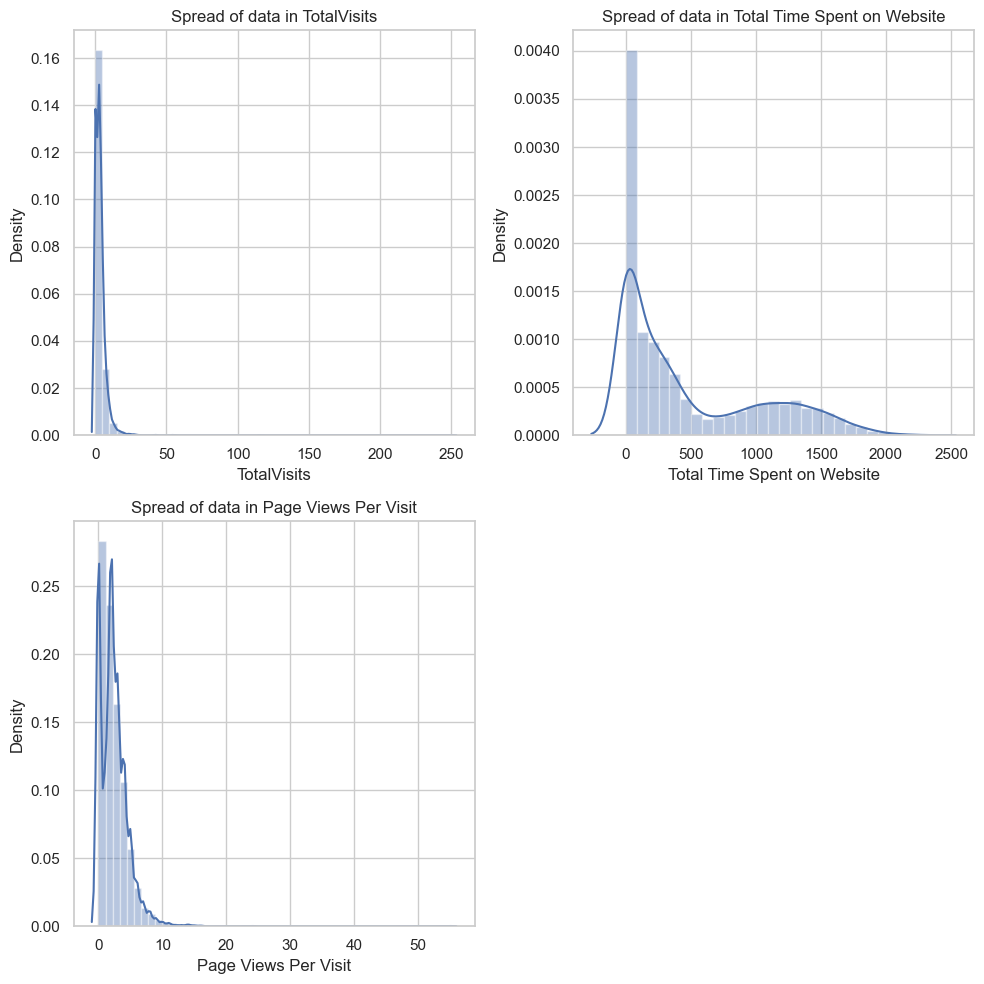

In [66]:
#Let's see the spread of the data

def spread(x, fig):
    plt.subplot(2,2,fig) 
    sns.distplot(df[x])
    plt.title('Spread of data in'+' '+ x)
    plt.xlabel(x)

    
plt.figure(figsize=(10,10))

spread('TotalVisits',1)
spread('Total Time Spent on Website',2)
spread('Page Views Per Visit',3)

plt.tight_layout()

<a> We observe that our data is skewed.

In [67]:
#Checking whether Data imbalance exists or not
round(((sum(df['Converted'])/len(df.index))*100),2)

38.02

<a> We observe that only 38% of the leads are converted, whereas 62% are not converted. Thus, there exists data imbalance in the dataset. The data is biased towards leads that are not converted.

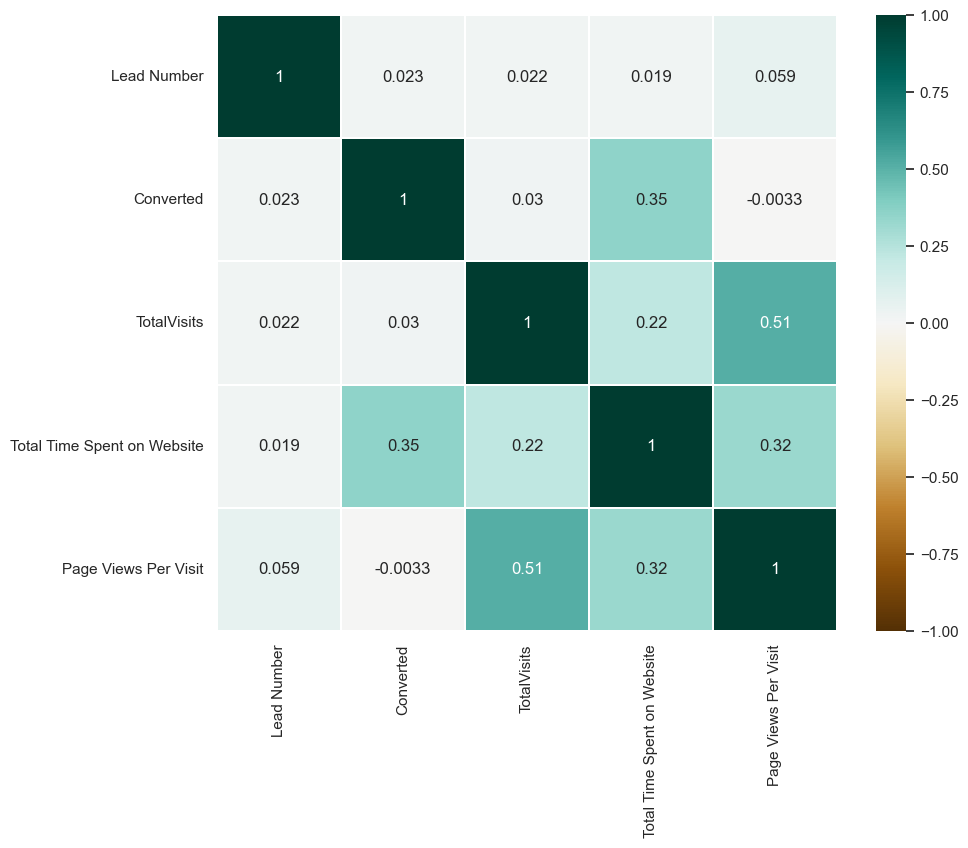

In [68]:
# Observing Correlation
# figure size
plt.figure(figsize=(10,8))

# heatmap
updated_df = df.select_dtypes(include=[np.number])
sns.heatmap(data=updated_df.corr(), annot=True,cmap="BrBG", robust=True, linewidths=0.1, vmin=-1 )
plt.show()

<a> We can observe that all these variables are not highly correlated with each other.

 **<b>2.  Visualizing categorical columns </b>**

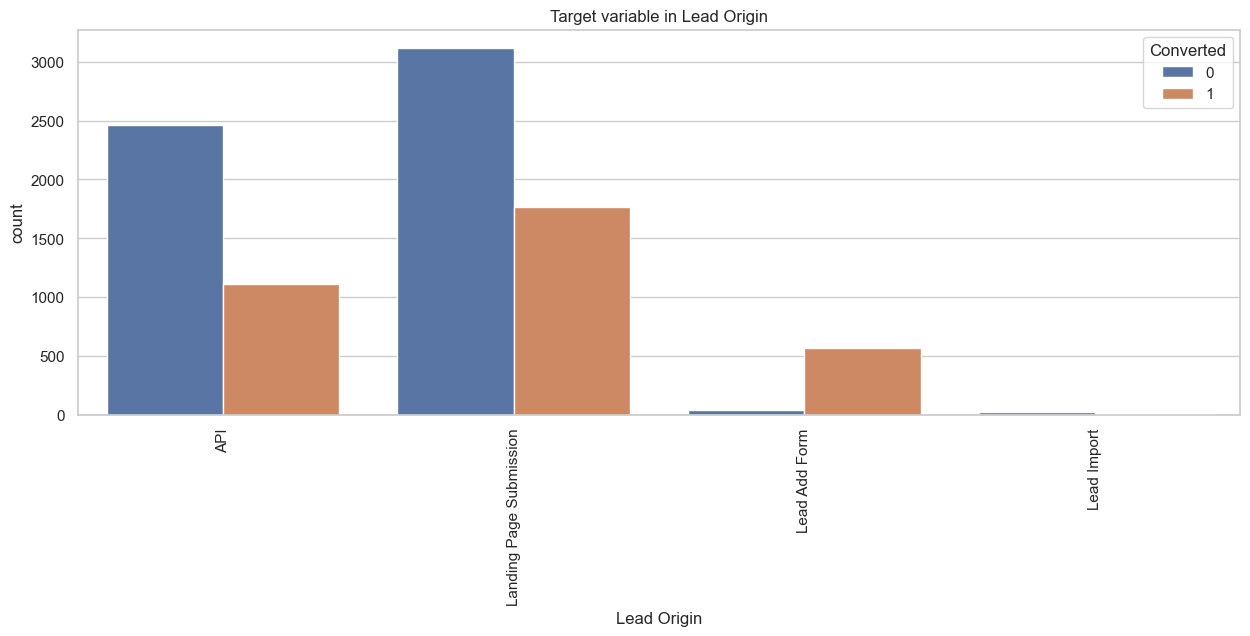

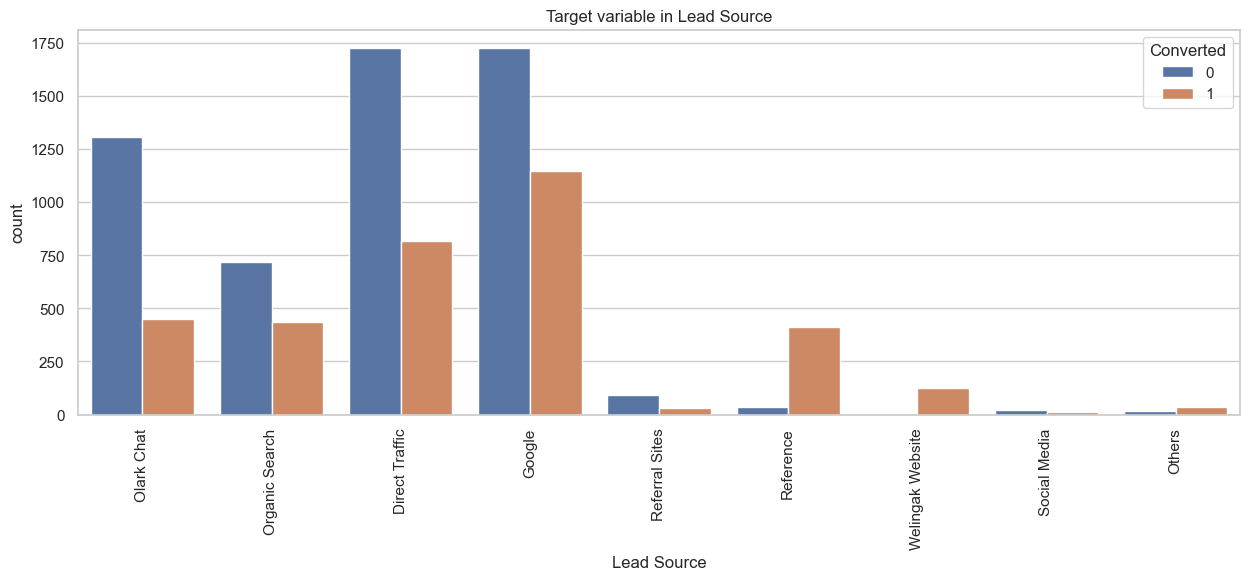

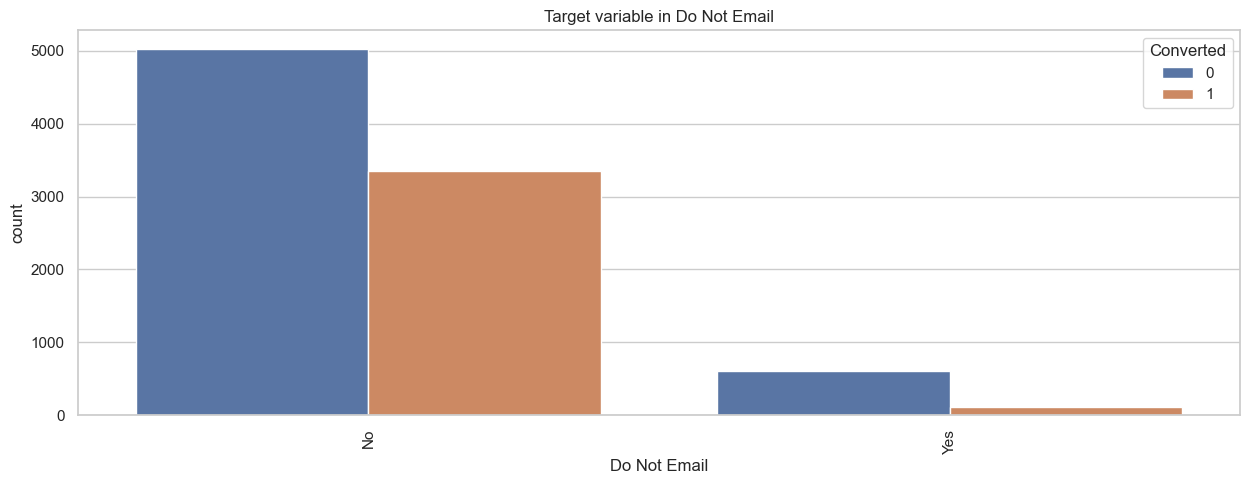

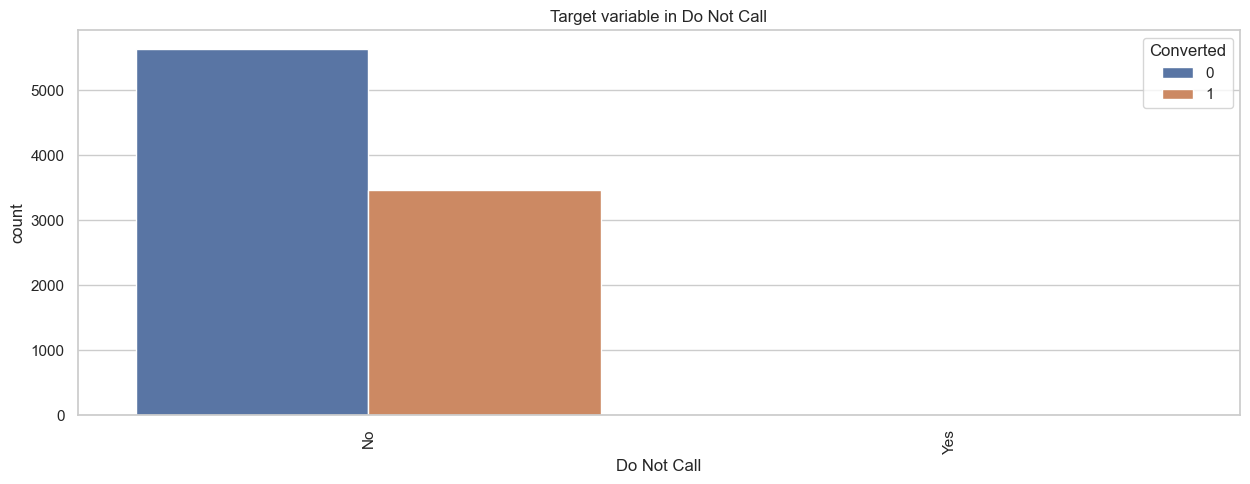

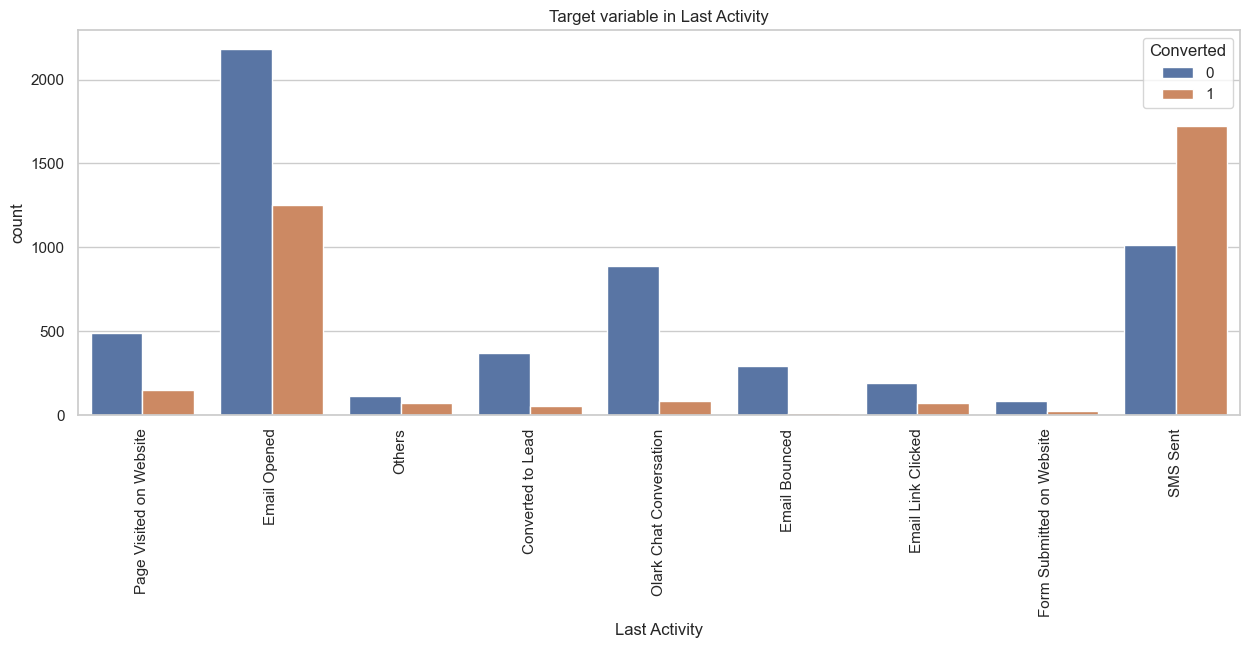

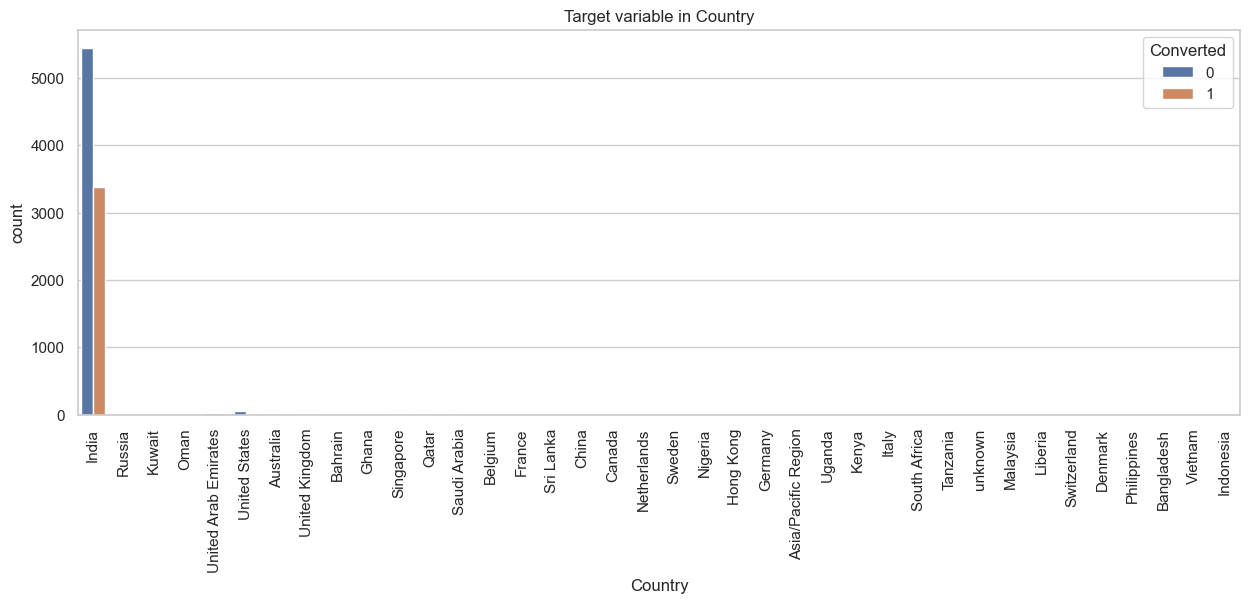

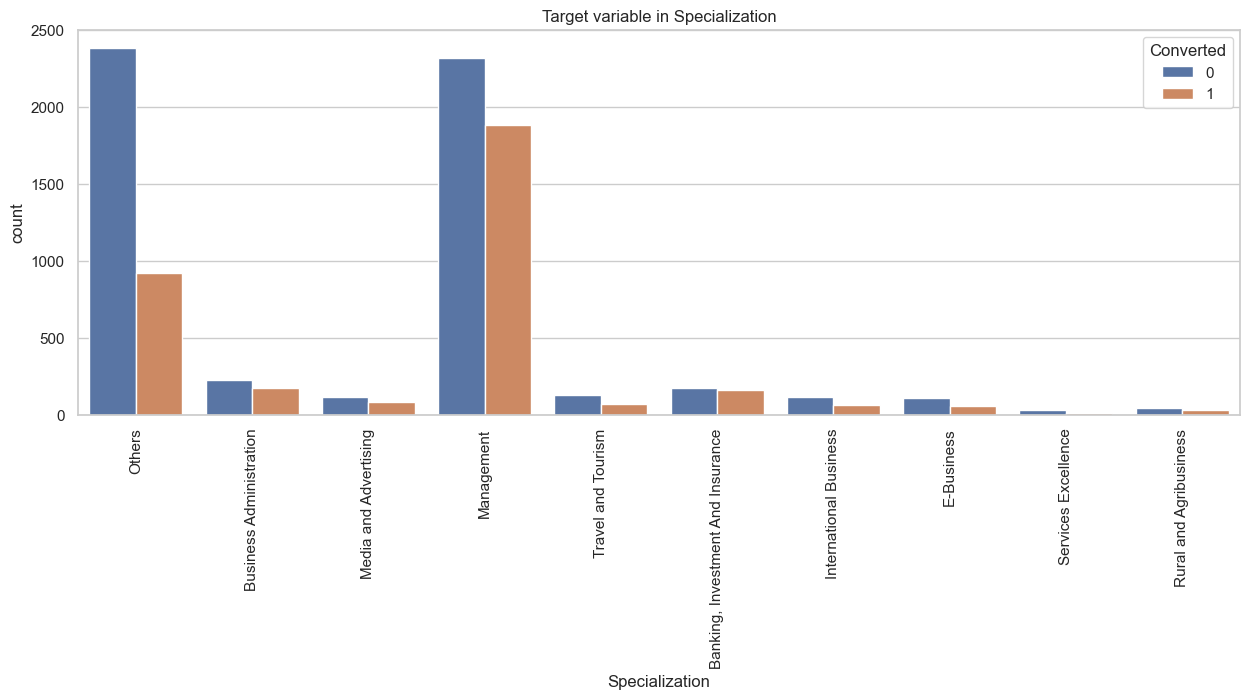

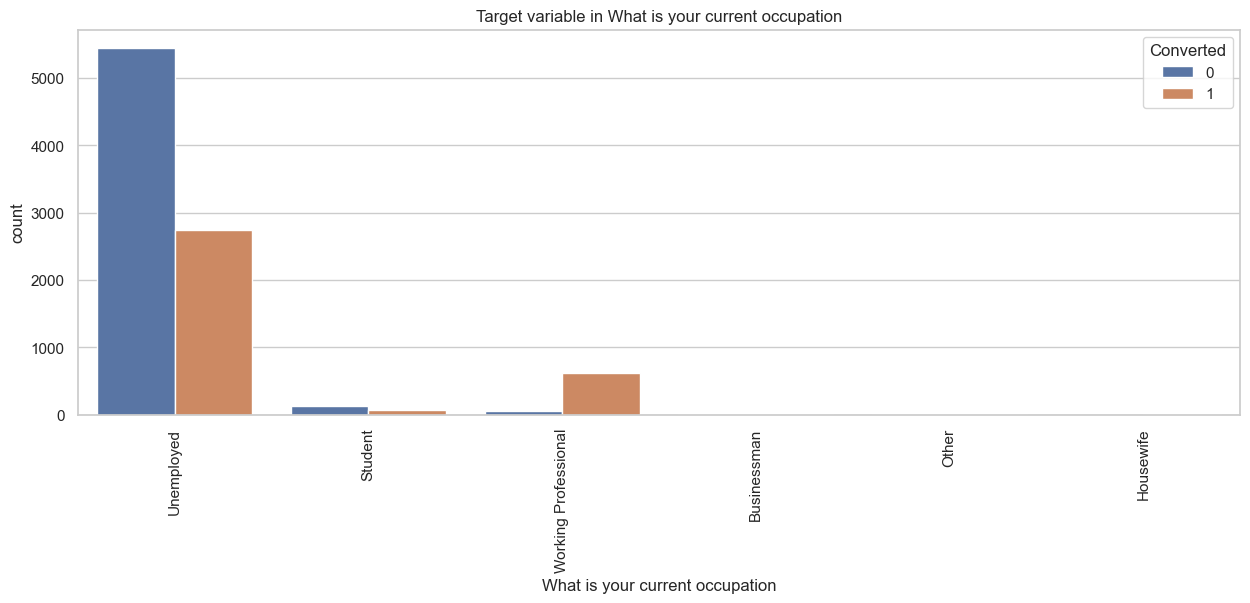

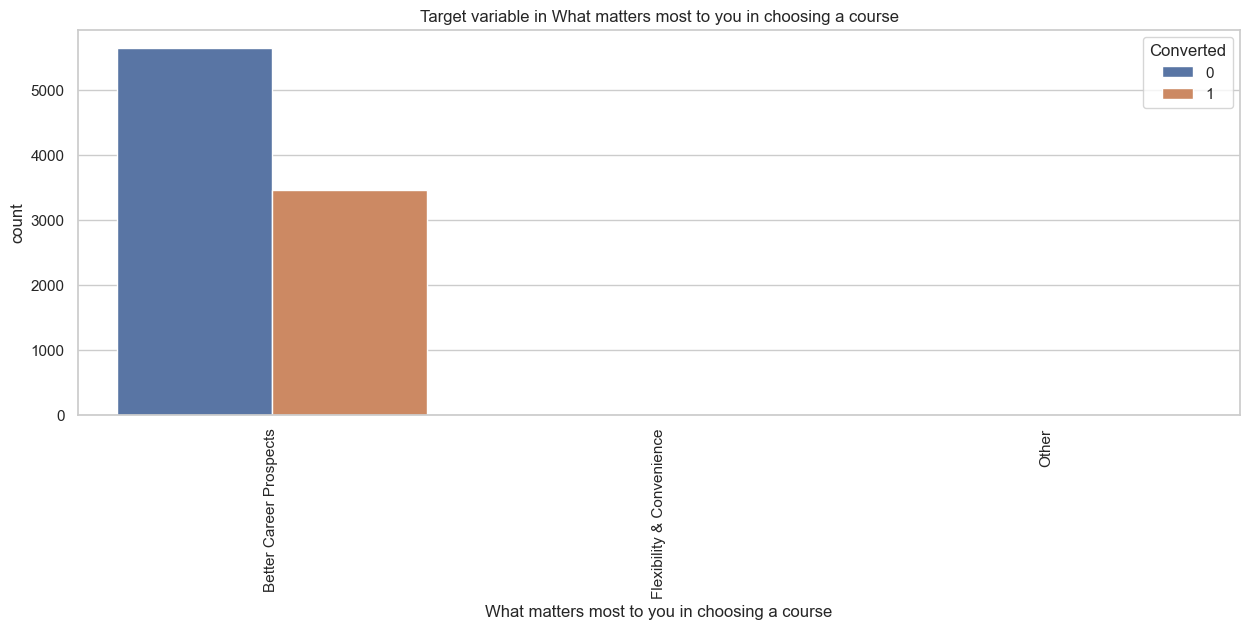

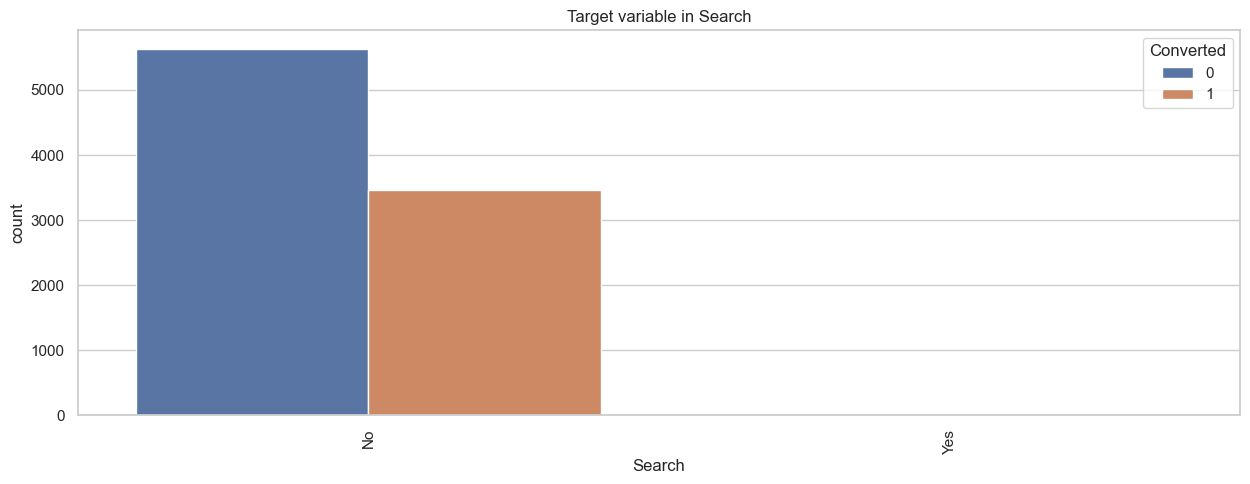

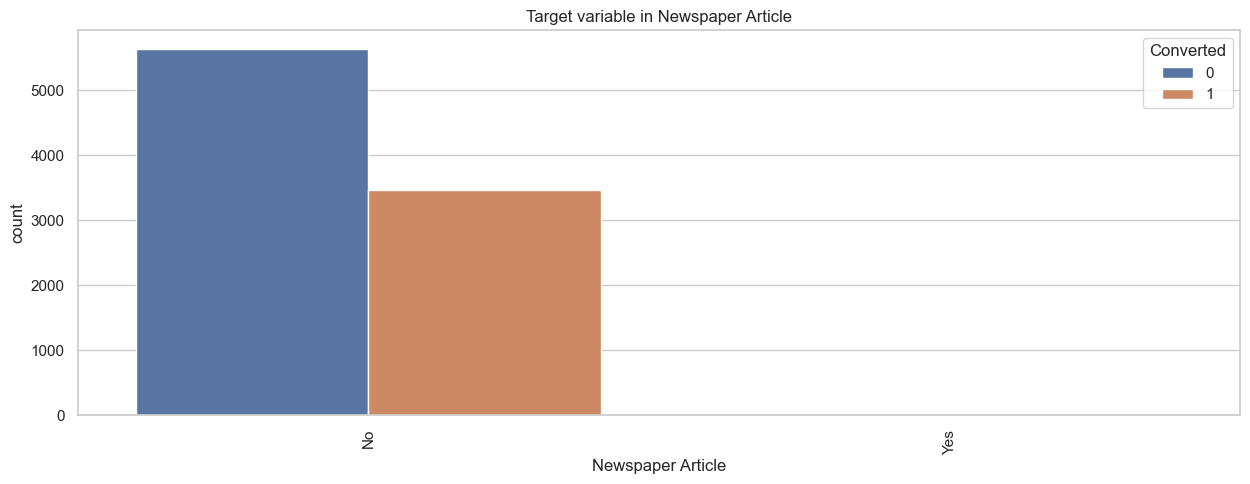

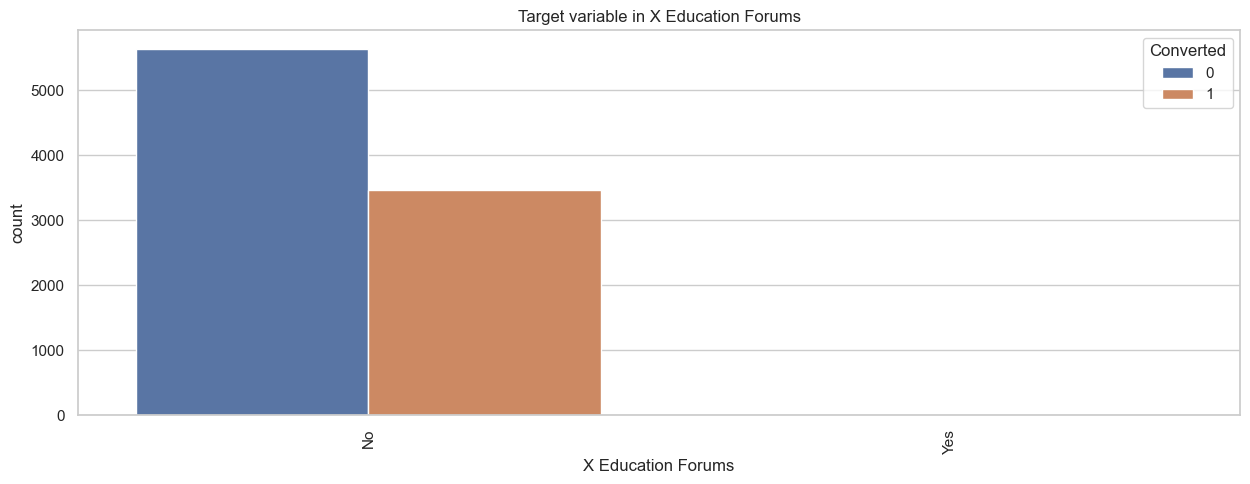

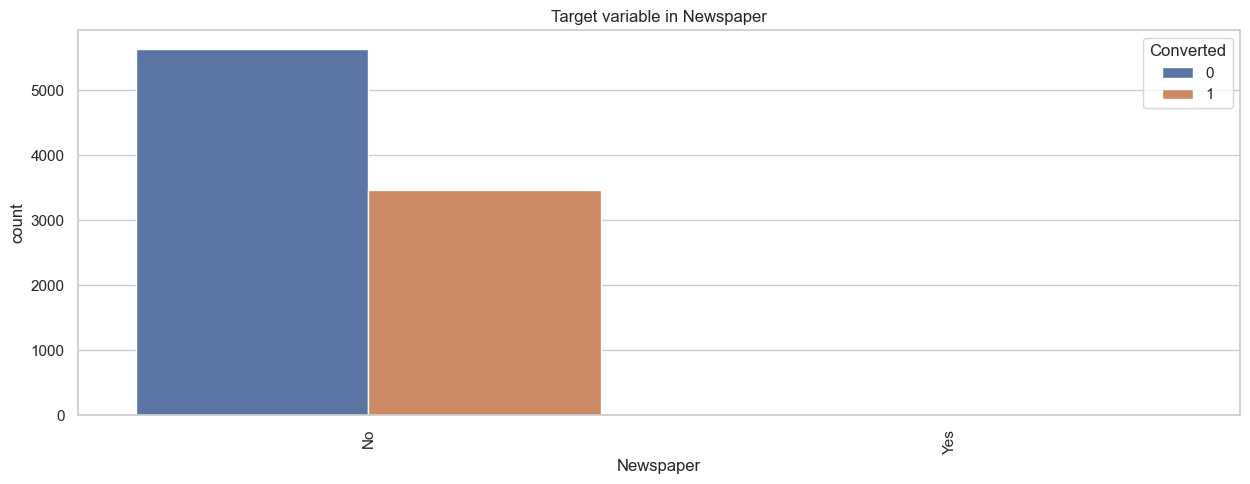

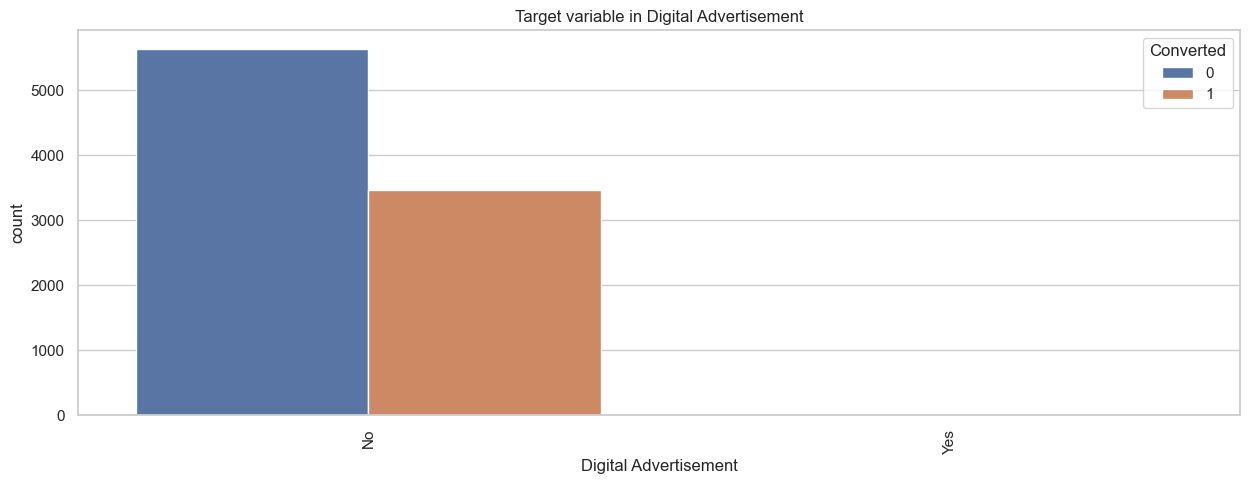

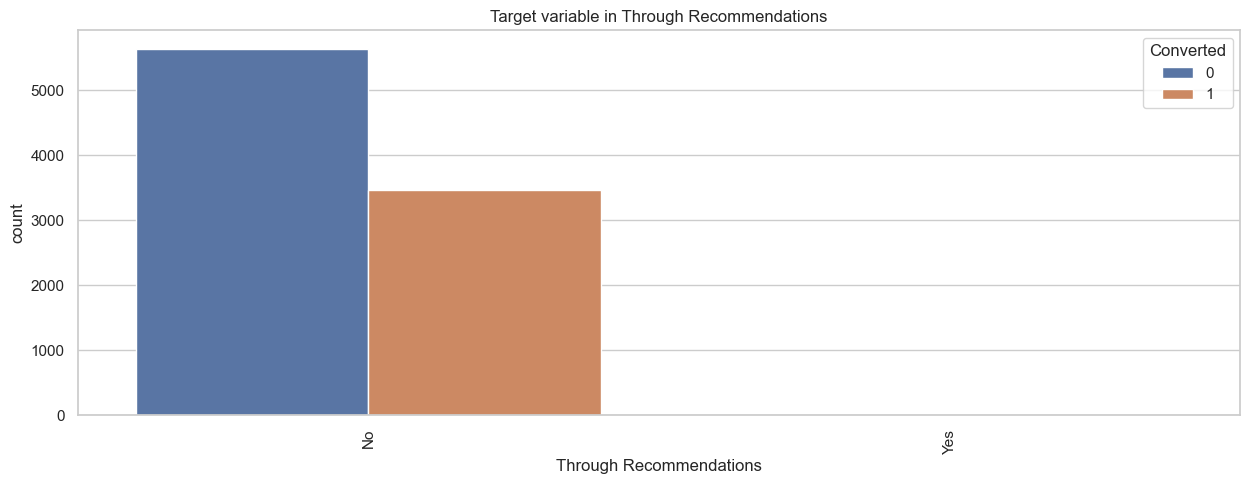

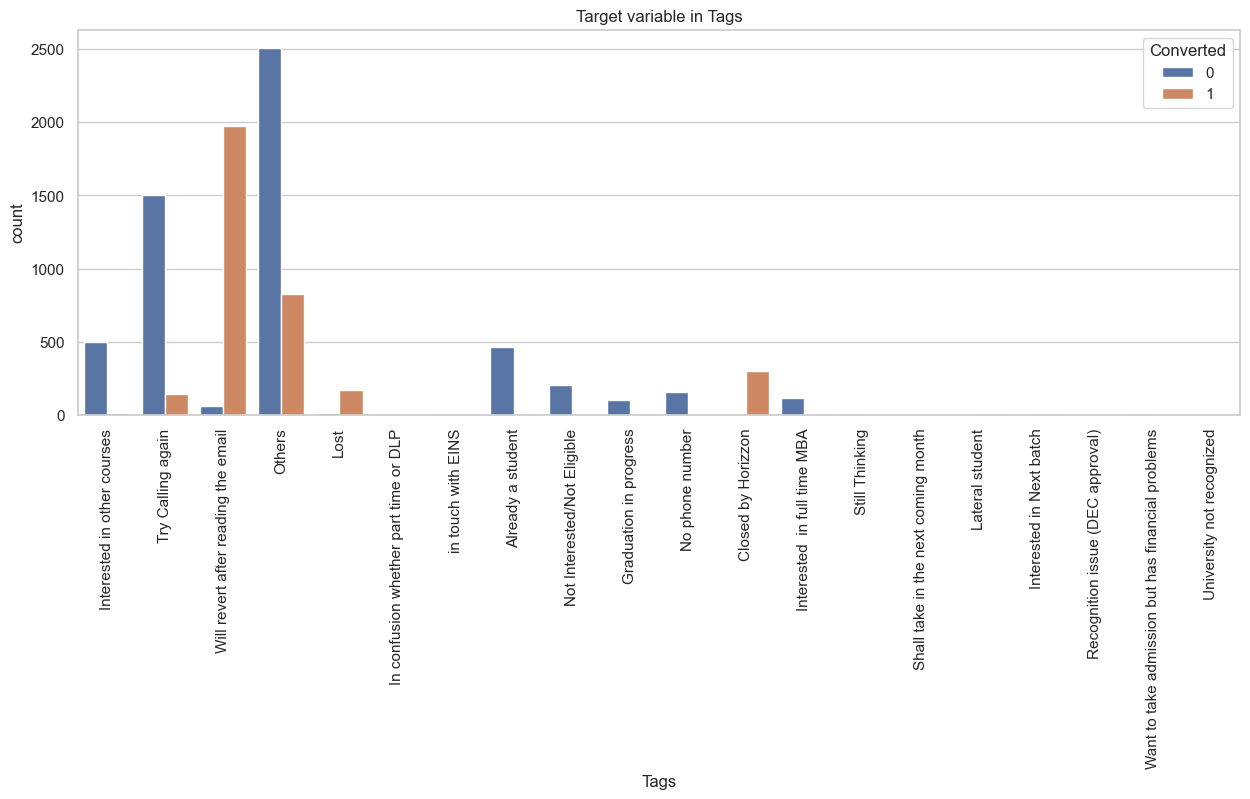

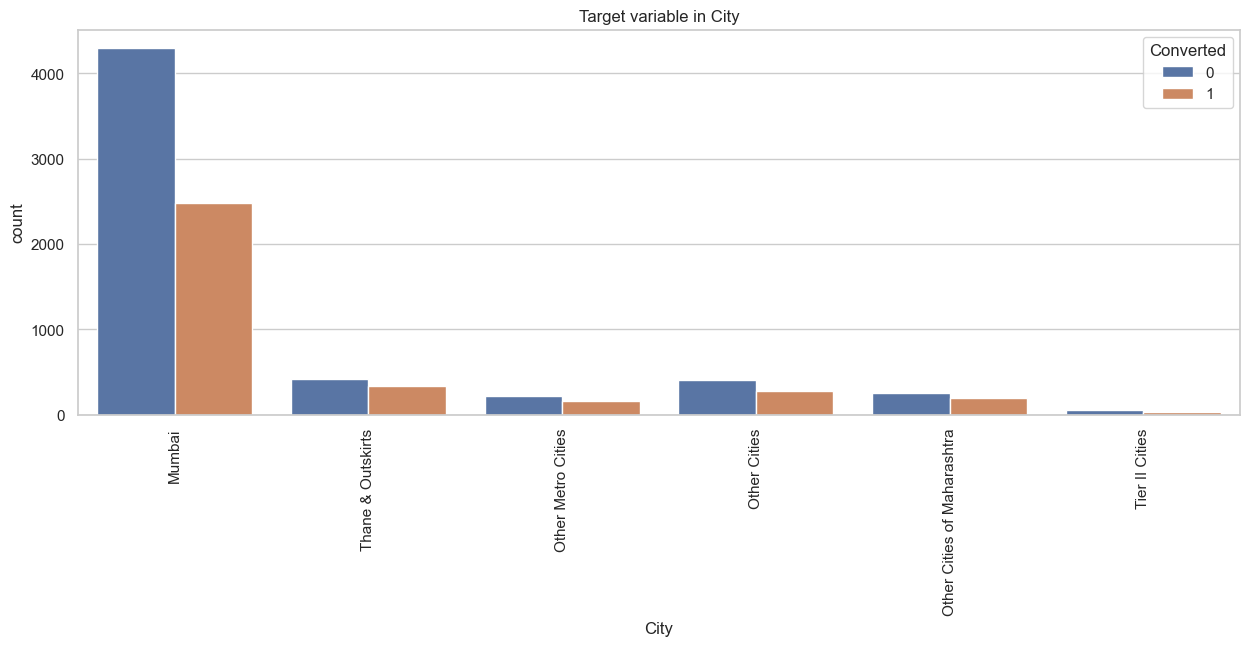

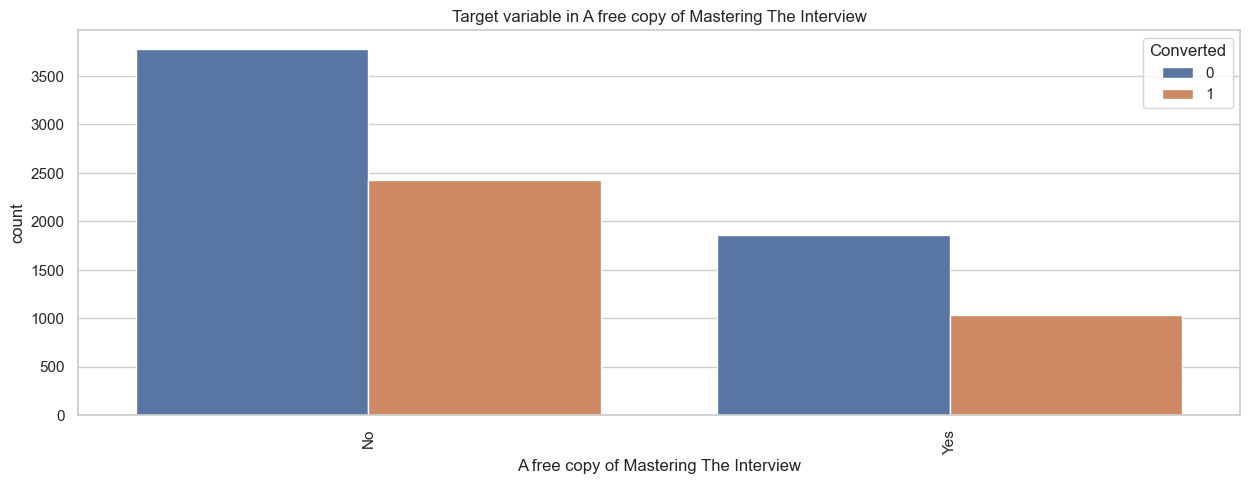

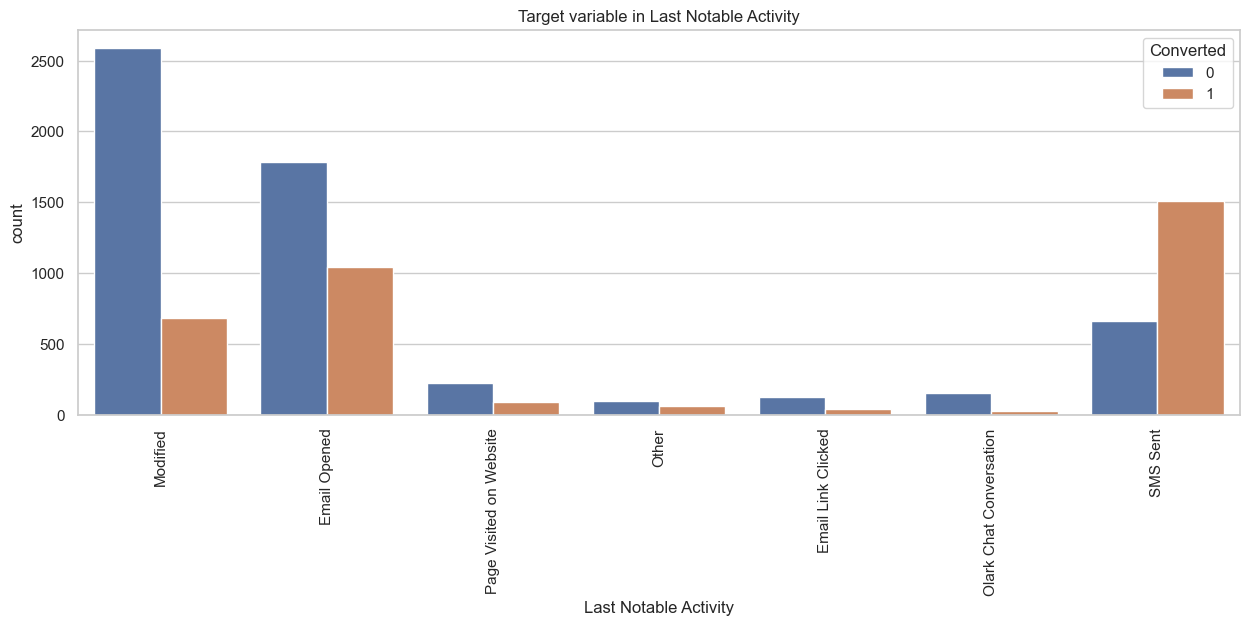

In [69]:
conv = df.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize =(15,5))
    sns.countplot(data=df, x=i, hue='Converted')
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()


### <a>**Inferences:** <br>
<a>
    
 - Lead Origin<br>
 
    1.)Customers who were identified as Leads from `Landing Page submission`, constitute the majority of the leads.<br>
    2.)Customers originating from `Lead Add Form` have high probability of conversion. These customers are very few in number.<br>
    3.)`API` & `Lead Import` have the least conversion rate. These customers are very few in number.<br>
        
To improve overall lead conversion rate, we need to focus more on improving lead conversion rate of Customers originating from API and Landing Page Submission and generate more leads from Lead Add Form.<br>

 - Lead Source <br>
    1.)Majority sources of the lead are `Google` & `Direct Traffic`. 
    2.)Lead source from `Google` has highest probability of conversion.
    3.)Leads with source `Reference` has maximum probability of conversion.

 - Do Not Email<br>
 
    1.)Customers who do not opt for `Do Not Mail` have higher conversion rate which is around 40%. These constitute the majority of the leads.<br>


 - Do Not Call<br>
 
   Customers who do not opt for `Do Not call` have Higher conversion rate which is around 38%.These constitute the majority of the leads.<br><br>
   
 - Last Activity<br>
 
    1.)Customers whose last activity was `SMS Sent` have higher conversion rate which is around 63%. 
    2.)Customers whose last activity was `Email Opened` constitute majority of the customers. They have around 36% of conversion rate.<br>

To improve overall lead conversion rate, we need to focus more on improving lead converion rate of Customers whose last activity was `Email Opened` and generate more leads from the ones whose last activity was `SMS Sent`.<br>

- Specialization<br>
    1.)Maximum Leads have specialization as `Management` & `Others`.
    2.)Leads with specialization as `Rural & Agribusiness` have least probability of conversion.<br>
    
    
- What is your current occupation<br>
    1.)Maximum Leads are `Unemployed`.<bR>
    2.)Very few leads are Housewives <br>
    
    
- What matters most to you in choosing a career<br>
    Number of Leads to whom better career aspects matters the most in choosing a career are more & have higher probability of conversion.<br>
    
    
- Search, Newspaper Article,X Education Forums, Newspaper & Digital Advertisement  <br>
    Customers who have seen the add of the education company in any form, are very few in number. No meaningful insight can be concluded from the plot that will improve the overall lead conversion rate.<br>
    
    
- Tags<br>
     More focus shall be given on the leads with tags, `will revert after reading the mail` & `others` as these are the potential leads and have higher rate of conversion.<br>
    
    
- City<br>
     Majority of the leads are from `Mumbai` city. Customers from Mumbai city should be targeted more as these are the potential leads.<br>
    
    
- A Free Copy Of Mastering the Interview<br>
     Customers who ask for ` a free copy of mastering the interview` are less in number but the conversion probabilty for both types of customers is similar.<br>


- Last Notable Activity <br>
    1.)Customers whose last notable activity was `Modified` are more in number.<br>
    2.)Customers whose last notable activity was `SMS Sent` have higher probability of conversion.


#### a) Handling High Data imbalance

From the above plots, we can observe that there is data imbalance in some columns. These will give biased results. Hence it is better to drop them:<br>

 - 'Do Not Call'
 - 'Country'
 - 'Search',
 - 'Newspaper Article', 
 - 'X Education Forums', 
 - 'Newspaper',
 - 'Digital Advertisement', 
 - 'Through Recommendations'
 - 'What matters most to you in choosing a course'

In [70]:
# Dropping the column 'country'
imbalance_data = ['Do Not Call','Country','Search','Newspaper Article','X Education Forums','Newspaper',
                  'Digital Advertisement', 'Through Recommendations','What matters most to you in choosing a course']
df = df.drop(imbalance_data,axis =1)

In [71]:
df.shape

(9103, 15)

 **<b>3.  Visualizing Numerical columns </b>**- 

<b> a.) Outlier Analysis

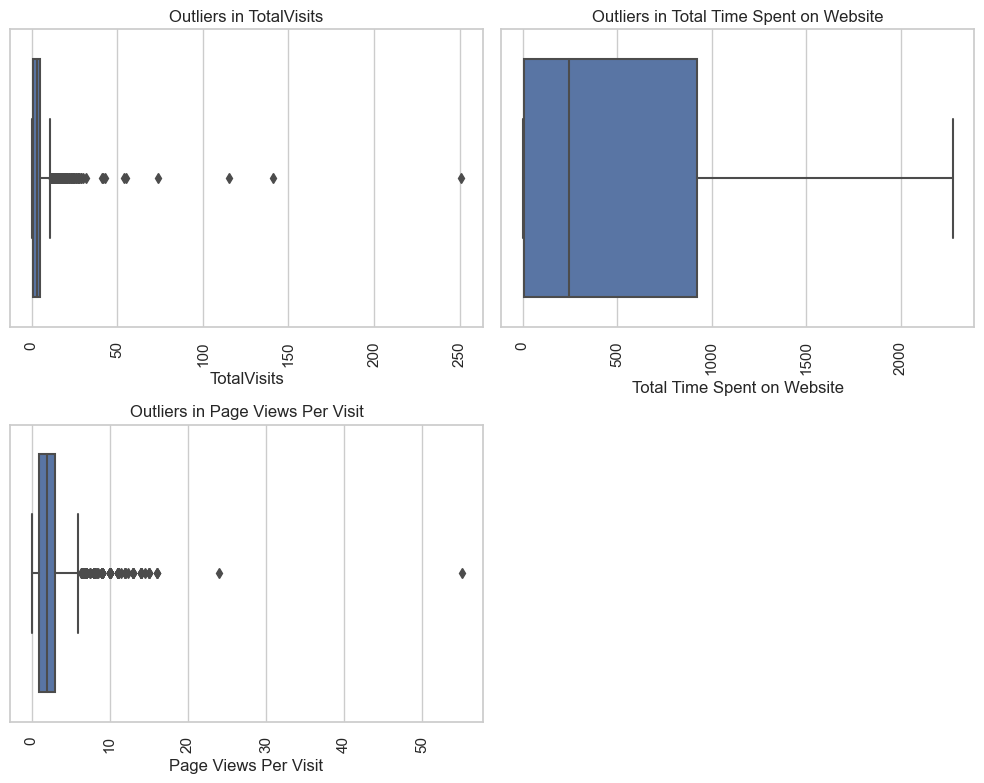

In [72]:
def boxplot(x,fig,):
    plt.subplot(2,2,fig)
    sns.boxplot(x = x, data = df)
    plt.title('Outliers in'+' '+ x)
    plt.xlabel(x)
    plt.xticks(rotation = 90)

                         
plt.figure(figsize =(10,8))
                         
boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

<a> We observe some extreme values in : `Total Visits` & `Page Views Per visit`.

In [73]:
# Checking percentile values 
df[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']].describe(percentiles=[0.01, 0.05, .25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,481.350104,3.445238,2.362820
std,545.066142,4.854853,2.161418
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,9.000000,1.000000,1.000000
50%,244.000000,3.000000,2.000000
75%,919.500000,5.000000,3.000000
90%,1372.000000,7.000000,5.000000


In [74]:
# removing outliers using the IQR
Q1 = df['TotalVisits'].quantile(0.01)
Q3 = df['TotalVisits'].quantile(0.99)
df = df.loc[(df['TotalVisits'] >= Q1) & (df['TotalVisits'] <= Q3)]

Q1 = df['Page Views Per Visit'].quantile(0.01)
Q3 = df['Page Views Per Visit'].quantile(0.99)
df=df.loc[(df['Page Views Per Visit'] >= Q1) & (df['Page Views Per Visit'] <= Q3)]

Q1 = df['Total Time Spent on Website'].quantile(0.01)
Q3 = df['Total Time Spent on Website'].quantile(0.99)
df=df.loc[(df['Total Time Spent on Website'] >= Q1) & (df['Total Time Spent on Website'] <= Q3)]

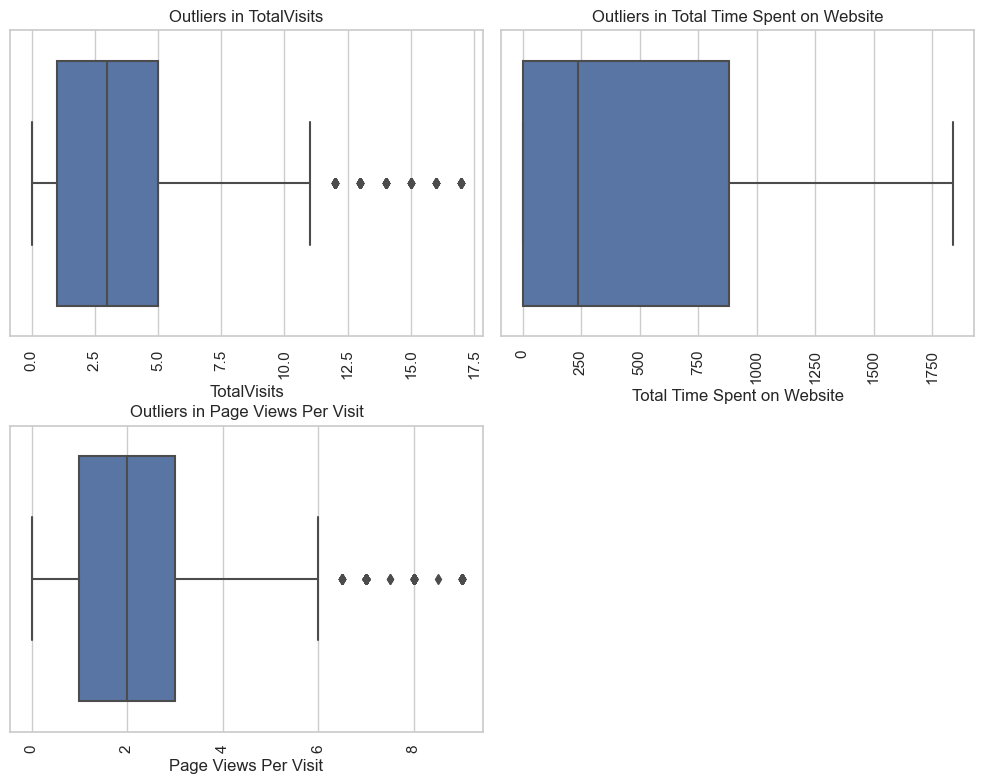

In [75]:
## After treatment of outliers
plt.figure(figsize =(10,8))
                         
boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

In [76]:
df.shape

(8863, 15)

<b> b.) Bivariate Analysis - Visualizing Numerical Columns with Target Column

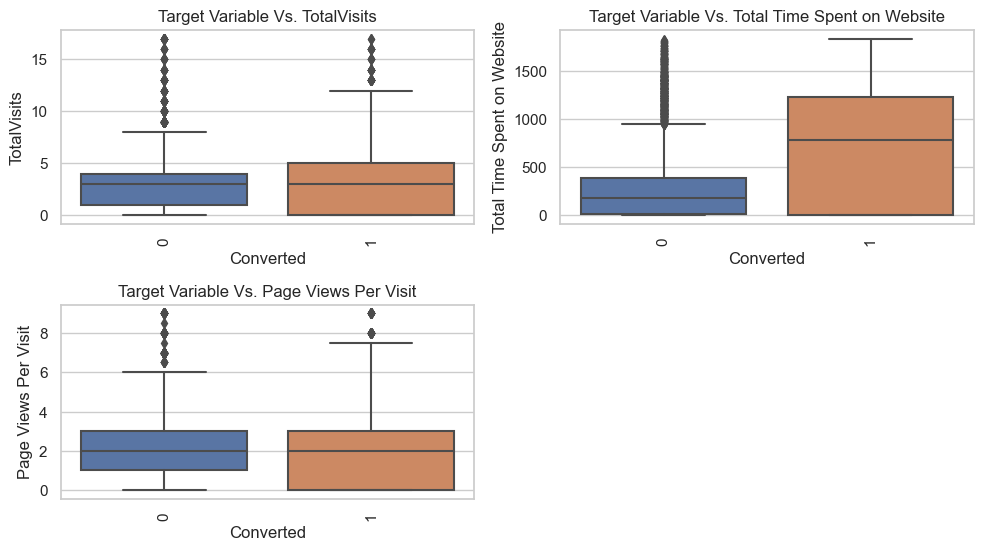

In [77]:
def boxplot(y,fig):
    plt.subplot(3,2,fig)
    sns.boxplot(x = 'Converted', y = y, data = df)
    plt.title('Target Variable Vs.'+' '+ y)
    plt.xlabel('Converted')
    plt.ylabel(y)
    plt.xticks(rotation = 90)

                         
plt.figure(figsize =(10,8))
                         

boxplot('TotalVisits',1)
boxplot('Total Time Spent on Website',2)
boxplot('Page Views Per Visit',3)

plt.tight_layout()

### <a>**Inferences**
<a>     
 - `Total Visits` & `Page Views Per Visit`
     - Median for both types of Leads : converted and non converted are similar.
     - Nothing can be concluded from them.
 - `Total Time Spent on website`
     - Leads who spend more time on the X education website, have more chances of converting.


## <a> 4. Data Preparation

In [78]:
# Let us copy our dataset before proceeding with dummy creations
df_new = df.copy()
#Converting Binary variables yes/No to 0 or 1

def binary_map(x):
    return x.map({'Yes':1,'No':0})

In [79]:
cols = ['Do Not Email','A free copy of Mastering The Interview']
df_new[cols] = df_new[cols].apply(binary_map)

In [80]:
df_new.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5,674,2.5,Email Opened,Others,Unemployed,Try Calling again,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Others,Media and Advertising,Unemployed,Try Calling again,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [81]:
# Creating dummy variables for the categorical variables and dropping the first one
cols1 = [i for i in df_new.select_dtypes(include ='object').columns if len(df_new[i].value_counts()) >2 and i != 'Lead Number']

dummy1 = pd.get_dummies(df[cols1], drop_first= True)
df_new.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,5,674,2.5,Email Opened,Others,Unemployed,Try Calling again,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Others,Media and Advertising,Unemployed,Try Calling again,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [82]:
#concatenating the dummy variables with Original DataFrame
df_new = pd.concat([df_new,dummy1], axis =1)
df_new.shape

(8863, 78)

In [83]:
cols1 = [i for i in df_new.select_dtypes(include ='object').columns if len(df_new[i].value_counts()) >2 and i != 'Prospect ID']

#Dropping the variables which were converted into Dummies
df_new.drop(cols1, axis =1, inplace = True)
df_new.shape

(8863, 70)

In [84]:
#Seprarting Target Column from Original Dataframe.
y = df_new['Converted']
X = df_new.drop(['Converted','Lead Number'],axis = 1)

In [85]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0.0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,0,5,674,2.5,0,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,0,2,1532,2.0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
3,0,1,305,1.0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,0,2,1428,1.0,0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False


In [86]:
X[X.select_dtypes(include='bool').columns.difference(['Page Views Per Visit'])] = X[X.select_dtypes(include='bool').columns.difference(['Page Views Per Visit'])].astype(int)

In [87]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,2,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [88]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [89]:
#splitting the data into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

In [90]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (6204, 68)
y_train Size (6204,)


## <a> 5. Feature Scaling

In [91]:
scale = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()                                                                                                             

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5428,0,-1.071483,-0.871984,-1.184151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8583,0,0.641520,2.066787,0.128349,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
4637,0,-0.386282,-0.740141,-0.134151,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4468,0,-0.043681,-0.205124,0.390849,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2058,0,1.326721,-0.583457,-0.449151,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## <a> 6. Model Building

In [92]:
logreg = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6135
Model Family:                Binomial   Df Model:                           68
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1223.1
Date:                Sun, 28 Jul 2024   Deviance:                       2446.2
Time:                        14:33:28   Pearson chi2:                 7.65e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6034
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -7.0819      5.682     -1.246      0.213     -18.219       4.055
Do Not Email                                              -0.6656      0.290     -2.292      0.022      -1.235      -0.096
TotalVisits                                                0.2653      0.082      3.255      0.001       0.106       0.425
Total Time Spent on Website                                1.1019      0.063     17.539      0.000       0.979       1.225
Page Views Per Visit                                      -0.2144      0.095     -2.261      0.024      -0.400      -0.029
A free copy of Mastering The Interview                    -0.1045      0.180     -0.581      0.561      -0.457       0.248
Lead Origin_Landing Page Submission                       -0.2001      0.237     -0.843      0.399      -0.665       0.265
Lead Origin_Lead Add Form                                  1.5740      1.154      1.364      0.173      -0.688       3.836
Lead Origin_Lead Import                                  -17.9176   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                         0.2081      0.187      1.112      0.266      -0.159       0.575
Lead Source_Olark Chat                                     1.4227      0.254      5.598      0.000       0.925       1.921
Lead Source_Organic Search                                -0.0548      0.217     -0.252      0.801      -0.480       0.371
Lead Source_Others                                         1.3489      0.953      1.416      0.157      -0.519       3.216
Lead Source_Reference                                     -0.6725      1.220     -0.551      0.582      -3.064       1.719
Lead Source_Referral Sites                                 0.3835      0.445      0.862      0.389      -0.488       1.255
Lead Source_Social Media                                  18.8733   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                               4.0395      1.371      2.945      0.003       1.351       6.727
Last Activity_Email Bounced                               -1.0228      0.717     -1.427      0.153      -2.427       0.382
Last Activity_Email Link Clicked                           1.0981      0.600      1.831      0.067      -0.077       2.274
Last Activity_Email Opened                                 0.3196      0.410      0.779      0.436      -0.485       1.124
Last Activity_Form Submitted on Website                    1.0610      0.631      1.681      0.093      -0.176       2.298
Last Activity_Olark Chat Conversation                     -0.4351      0.424     -1.025      0.305      -1.267       0.397
Last Act

<b id ='6'> a.) Adopting RFE technique to select the features 

In [93]:
logreg = LogisticRegression(class_weight = 'balanced')
rfe = RFE(estimator=logreg,n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [94]:
rfe.support_

array([False, False,  True, False, False, False,  True, False, False,
        True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False,  True,
        True,  True, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False])

In [95]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 6),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 36),
 ('A free copy of Mastering The Interview', False, 43),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Source_Google', False, 32),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 52),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Social Media', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 34),
 ('Last Activity_Email Opened', False, 10),
 ('Last Activity_Form Submitted on Website', False, 8),
 ('Last Activity_Olark Chat Conversation', False, 16),
 ('Last Activity_Others', False, 54),
 ('Last Activity_Page Visited on Website', False, 53),
 ('Las

In [96]:
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost', 'Tags_No phone number',
       'Tags_Others', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

<b id ='6'> b.) Building model using GLM for the detailed statistics

### `MODEL 1`

In [97]:
logreg1 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family=sm.families.Binomial())
res = logreg1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1276.0
Date:                Sun, 28 Jul 2024   Deviance:                       2552.0
Time:                        14:33:30   Pearson chi2:                 7.66e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5966
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.9559      0.146    -27.179      0.000      -4.241      -3.671
Total Time Spent on Website                       1.0894      0.060     18.257      0.000       0.972       1.206
Lead Origin_Lead Add Form                         1.1433      0.375      3.047      0.002       0.408       1.879
Lead Source_Olark Chat                            1.4666      0.145     10.114      0.000       1.182       1.751
Lead Source_Others                                1.6462      0.719      2.288      0.022       0.236       3.056
Lead Source_Welingak Website                      4.3645      0.816      5.347      0.000       2.765       5.964
Last Activity_SMS Sent                            2.0461      0.114     17.902      0.000       1.822       2.270
Tags_Closed by Horizzon                           9.9657      1.036      9.622      0.000       7.936      11.996
Tags_Interested in Next batch                    22.7845   1.66e+04      0.001      0.999   -3.24e+04    3.25e+04
Tags_Lateral student                             24.8032   2.06e+04      0.001      0.999   -4.04e+04    4.05e+04
Tags_Lost                                         7.3732      0.444     16.612      0.000       6.503       8.243
Tags_No phone number                             -2.2500      1.039     -2.166      0.030      -4.286      -0.214
Tags_Others                                       2.1789      0.136     15.997      0.000       1.912       2.446
Tags_Will revert after reading the email          6.8764      0.226     30.463      0.000       6.434       7.319
Last Notable Activity_Modified                   -1.7821      0.128    -13.909      0.000      -2.033      -1.531
Last Notable Activity_Olark Chat Conversation    -2.1803      0.461     -4.734      0.000      -3.083      -1.278
=================================================================================================================
"""

In [98]:
#Calculate VIF of the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF',ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.95
2,Lead Source_Olark Chat,1.64
11,Tags_Others,1.61
12,Tags_Will revert after reading the email,1.60
0,Total Time Spent on Website,1.47
5,Last Activity_SMS Sent,1.44
13,Last Notable Activity_Modified,1.40
4,Lead Source_Welingak Website,1.38
6,Tags_Closed by Horizzon,1.22
14,Last Notable Activity_Olark Chat Conversation,1.08


### `MODEL 2`

In [99]:
cols = cols.drop('Tags_Lateral student')
logreg2 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family = sm.families.Binomial())
res = logreg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1282.5
Date:                Sun, 28 Jul 2024   Deviance:                       2565.0
Time:                        14:33:30   Pearson chi2:                 7.57e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5958
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.9400      0.145    -27.230      0.000      -4.224      -3.656
Total Time Spent on Website                       1.0860      0.059     18.255      0.000       0.969       1.203
Lead Origin_Lead Add Form                         1.1389      0.374      3.046      0.002       0.406       1.872
Lead Source_Olark Chat                            1.4734      0.145     10.184      0.000       1.190       1.757
Lead Source_Others                                1.6462      0.717      2.295      0.022       0.241       3.052
Lead Source_Welingak Website                      4.3717      0.816      5.359      0.000       2.773       5.971
Last Activity_SMS Sent                            2.0541      0.114     18.016      0.000       1.831       2.278
Tags_Closed by Horizzon                           9.9259      1.035      9.588      0.000       7.897      11.955
Tags_Interested in Next batch                    22.7627   1.66e+04      0.001      0.999   -3.24e+04    3.25e+04
Tags_Lost                                         7.3312      0.443     16.550      0.000       6.463       8.199
Tags_No phone number                             -2.2705      1.038     -2.187      0.029      -4.306      -0.235
Tags_Others                                       2.1510      0.135     15.900      0.000       1.886       2.416
Tags_Will revert after reading the email          6.8447      0.225     30.473      0.000       6.404       7.285
Last Notable Activity_Modified                   -1.7541      0.127    -13.783      0.000      -2.004      -1.505
Last Notable Activity_Olark Chat Conversation    -2.1719      0.460     -4.723      0.000      -3.073      -1.271
=================================================================================================================
"""

In [100]:
#checking vif values
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.945280
2,Lead Source_Olark Chat,1.642028
10,Tags_Others,1.613289
11,Tags_Will revert after reading the email,1.595973
0,Total Time Spent on Website,1.469841
5,Last Activity_SMS Sent,1.433898
12,Last Notable Activity_Modified,1.400637
4,Lead Source_Welingak Website,1.379202
6,Tags_Closed by Horizzon,1.224472
13,Last Notable Activity_Olark Chat Conversation,1.076708


### `MODEL 3`

In [101]:
cols = cols.drop("Tags_Interested in Next batch")
logreg3 = sm.GLM(y_train,(sm.add_constant(X_train[cols])),family = sm.families.Binomial())
res = logreg3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6190
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1286.6
Date:                Sun, 28 Jul 2024   Deviance:                       2573.3
Time:                        14:33:30   Pearson chi2:                 7.55e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5952
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.9207      0.144    -27.275      0.000      -4.202      -3.639
Total Time Spent on Website                       1.0858      0.059     18.295      0.000       0.969       1.202
Lead Origin_Lead Add Form                         1.2437      0.375      3.319      0.001       0.509       1.978
Lead Source_Olark Chat                            1.4710      0.144     10.180      0.000       1.188       1.754
Lead Source_Others                                1.5891      0.719      2.211      0.027       0.181       2.998
Lead Source_Welingak Website                      4.2666      0.816      5.229      0.000       2.667       5.866
Last Activity_SMS Sent                            2.0611      0.114     18.101      0.000       1.838       2.284
Tags_Closed by Horizzon                           9.8619      1.034      9.541      0.000       7.836      11.888
Tags_Lost                                         7.3070      0.443     16.508      0.000       6.439       8.175
Tags_No phone number                             -2.2951      1.038     -2.210      0.027      -4.330      -0.260
Tags_Others                                       2.1299      0.134     15.847      0.000       1.866       2.393
Tags_Will revert after reading the email          6.8138      0.223     30.500      0.000       6.376       7.252
Last Notable Activity_Modified                   -1.7558      0.127    -13.804      0.000      -2.005      -1.506
Last Notable Activity_Olark Chat Conversation    -2.1682      0.460     -4.718      0.000      -3.069      -1.268
=================================================================================================================
"""

In [102]:
#checking vif values
vif = pd.DataFrame()
X = X_train[cols]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
1,Lead Origin_Lead Add Form,1.942572
2,Lead Source_Olark Chat,1.641850
9,Tags_Others,1.612950
10,Tags_Will revert after reading the email,1.594053
0,Total Time Spent on Website,1.469263
5,Last Activity_SMS Sent,1.431213
11,Last Notable Activity_Modified,1.400635
4,Lead Source_Welingak Website,1.378624
6,Tags_Closed by Horizzon,1.224177
12,Last Notable Activity_Olark Chat Conversation,1.076704


<A>None of the VIF's are above 5 and from the summary, we can see that none of them have significant p-value (> 0.05). So we can conclude here that this is our final model.

### Variables selected in the final model are:

In [103]:
print("The final Variables selected are:")
cols

The final Variables selected are:


Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Lost', 'Tags_No phone number',
       'Tags_Others', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

## <a> 7. Making Predictions on the Train Set

In [104]:
# Getting the predicted values on the train set
X_train_sm = sm.add_constant(X_train[cols])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5428    0.219845
8583    0.994160
4637    0.008799
4468    0.117789
2058    0.081338
1720    0.969919
2287    0.046427
1434    0.001554
5553    0.995842
8330    0.994902
dtype: float64

In [105]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21984451, 0.99415998, 0.00879886, 0.11778937, 0.08133767,
       0.96991879, 0.04642709, 0.00155391, 0.99584172, 0.99490247])

In [106]:
#Creating a dataframe with the actual and the predicted probabilities

y_train_pred_final = pd.DataFrame()
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_prob'] = y_train_pred
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob
0,5428,0,0.219845
1,8583,1,0.994160
2,4637,0,0.008799
3,4468,0,0.117789
4,2058,0,0.081338


In [107]:
#Creating new column 'predicted' with 1, if Probability > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted
0,5428,0,0.219845,0
1,8583,1,0.994160,1
2,4637,0,0.008799,0
3,4468,0,0.117789,0
4,2058,0,0.081338,0


In [108]:
# Confusion matrix for the target column : 'converted'

confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
print(confusion)

[[3738  163]
 [ 321 1982]]


In [109]:
# Classification Report
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted'] ))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3901
           1       0.92      0.86      0.89      2303

    accuracy                           0.92      6204
   macro avg       0.92      0.91      0.92      6204
weighted avg       0.92      0.92      0.92      6204



<a> Summary:
   
 - Accuracy - 92%
 - Precision - 92%
 - Recall - 86%

### Other Metrics

In [110]:
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP = confusion[1,1] # true positives 

In [111]:
# Sensitivity
TP / float(TP+FN)

0.860616587060356

In [112]:
# Specificity
TN / float(TN+FP)

0.9582158420917714

In [113]:
# False Positive rate
print(FP/ float(TN+FP))

0.04178415790822866


In [114]:
# Positive Predictive value 
print (TP / float(TP+FP))

0.924009324009324


In [115]:
# Negative Predictive value
print (TN / float(TN+ FN))

0.9209164818920916


In [116]:
#Plotting ROC Curve
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(7, 7))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

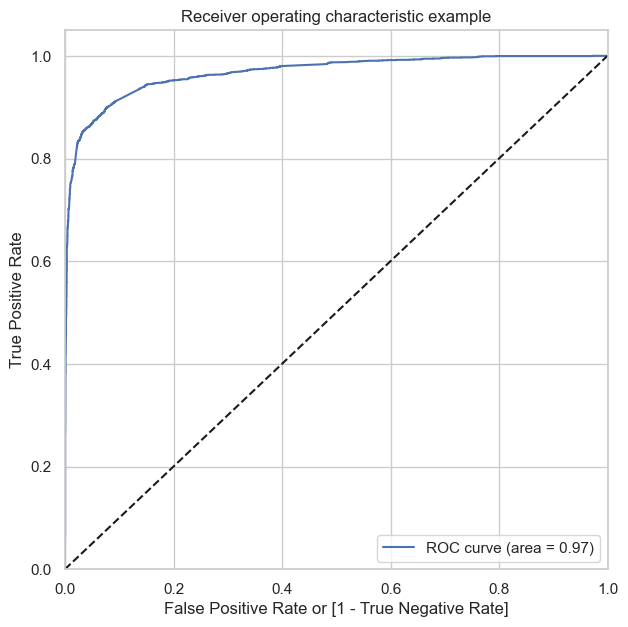

In [118]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cut off Point

In [119]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,5428,0,0.219845,0,1,1,1,0,0,0,0,0,0,0
1,8583,1,0.994160,1,1,1,1,1,1,1,1,1,1,1
2,4637,0,0.008799,0,1,0,0,0,0,0,0,0,0,0
3,4468,0,0.117789,0,1,1,0,0,0,0,0,0,0,0
4,2058,0,0.081338,0,1,0,0,0,0,0,0,0,0,0


In [120]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.371212  1.000000  0.000000
0.1   0.1  0.826080  0.960921  0.746475
0.2   0.2  0.885719  0.940078  0.853627
0.3   0.3  0.913604  0.900999  0.921046
0.4   0.4  0.916989  0.880591  0.938477
0.5   0.5  0.921986  0.860617  0.958216
0.6   0.6  0.922631  0.838906  0.972058
0.7   0.7  0.910703  0.787668  0.983338
0.8   0.8  0.904417  0.764221  0.987183
0.9   0.9  0.884913  0.701259  0.993335


<Figure size 1200x600 with 0 Axes>

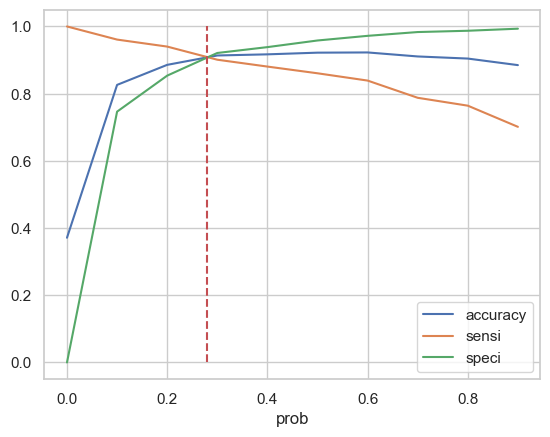

In [121]:
# Let's plot accuracy, sensitivity and specificity for various probabilities
plt.figure(figsize = (12,6))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.28,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

In [122]:
#### From the above curve, 0.28 is the optimum point to take it as a cutoff probability

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,5428,0,0.219845,0,1,1,1,0,0,0,0,0,0,0,0
1,8583,1,0.994160,1,1,1,1,1,1,1,1,1,1,1,1
2,4637,0,0.008799,0,1,0,0,0,0,0,0,0,0,0,0
3,4468,0,0.117789,0,1,1,0,0,0,0,0,0,0,0,0
4,2058,0,0.081338,0,1,0,0,0,0,0,0,0,0,0,0


In [123]:
#Assigning Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,5428,0,0.219845,0,1,1,1,0,0,0,0,0,0,0,0,22
1,8583,1,0.994160,1,1,1,1,1,1,1,1,1,1,1,1,99
2,4637,0,0.008799,0,1,0,0,0,0,0,0,0,0,0,0,1
3,4468,0,0.117789,0,1,1,0,0,0,0,0,0,0,0,0,12
4,2058,0,0.081338,0,1,0,0,0,0,0,0,0,0,0,0,8


In [124]:
# Overall Accuracy.
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9124758220502901

In [125]:
confusion2 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3583,  318],
       [ 225, 2078]], dtype=int64)

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [127]:
# Sensitivity
print("Sensitivity of the logistic regression model is:  ",TP / float(TP+FN))

Sensitivity of the logistic regression model is:   0.9023013460703431


In [128]:
# Specificity
print("Specificity of the logistic regression model is: ",TN / float(TN+FP))

Specificity of the logistic regression model is:  0.9184824403998975


In [129]:
# False Postive rate
print("False positive rate:",FP/ float(TN+FP))

# Positive Predictive value 
print("Positive Predictive rate:",TP / float(TP+FP))

# Negative Predictive value
print("Negative Predictive rate:",TN / float(TN+ FN))

False positive rate: 0.08151755960010254
Positive Predictive rate: 0.8672787979966611
Negative Predictive rate: 0.9409138655462185


In [130]:
# Classification Report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3901
           1       0.87      0.90      0.88      2303

    accuracy                           0.91      6204
   macro avg       0.90      0.91      0.91      6204
weighted avg       0.91      0.91      0.91      6204



<a> Summary
 
 - Accuracy = 91.23%
 - Precision = 86%
 - Recall = 91%
 - f1-score = 88%

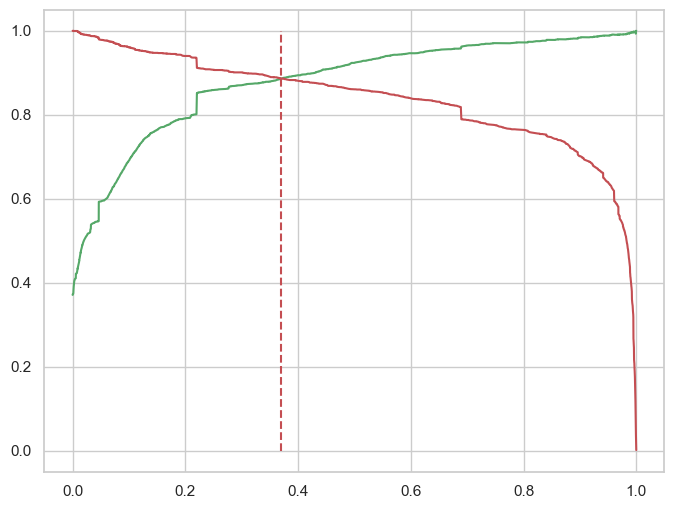

In [131]:
## Precision or Recall tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.figure(figsize = (8,6))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.37,ymax = 1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

<a>**`0.37` is the tradeoff between Precision and Recall -**<br>
So we can safely choose to consider any `Prospect Lead` with Conversion Probability higher than `37 %` to be a Hot Lead.

## <a> 8. Making Predictions on the Test Set

In [132]:
#Making predictions on the test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost,Tags_No phone number,Tags_Not Interested/Not Eligible,Tags_Others,Tags_Recognition issue (DEC approval),Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Try Calling again,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
8786,0,-1.071483,-0.871984,-1.184151,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7813,0,-0.043681,-0.375183,0.390849,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2405,0,1.326721,0.121618,0.653349,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
7246,0,-0.043681,-0.508937,0.390849,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5366,0,0.984121,0.515238,-0.134151,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [133]:
X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost,Tags_No phone number,Tags_Others,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
8786,-0.871984,1,0,0,1,0,0,0,0,1,0,1,0
7813,-0.375183,0,0,0,0,0,0,0,0,0,0,1,0
2405,0.121618,0,0,0,0,1,0,0,0,0,1,0,0
7246,-0.508937,0,1,0,0,0,0,0,0,1,0,1,0
5366,0.515238,0,0,0,0,0,0,0,0,0,0,1,0


In [134]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [135]:
#Making Predicition on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8786    0.734386
7813    0.002274
2405    0.993857
7246    0.067348
5366    0.005958
3924    0.046427
3349    0.012550
916     0.010850
7732    0.070307
1703    0.065325
dtype: float64

In [136]:
# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)

In [137]:
# Let's see the head
y_pred_df.head()

,0
8786,0.734386
7813,0.002274
2405,0.993857
7246,0.067348
5366,0.005958


In [138]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Lead ID'] = y_test_df.index

In [139]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [140]:
# Appending y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Lead ID,0
0,1,8786,0.734386
1,0,7813,0.002274
2,1,2405,0.993857
3,0,7246,0.067348
4,0,5366,0.005958


In [141]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [142]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead ID','Converted','Converted_prob'], axis=1)

In [143]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead ID,Converted,Converted_prob
0,8786,1,0.734386
1,7813,0,0.002274
2,2405,1,0.993857
3,7246,0,0.067348
4,5366,0,0.005958


In [144]:
# Creating new column "Lead Score" with values 1 to 100 using conversion rates
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
# Let's see the head
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score
0,8786,1,0.734386,73
1,7813,0,0.002274,0
2,2405,1,0.993857,99
3,7246,0,0.067348,7
4,5366,0,0.005958,1


In [145]:
#Taking 0.37 as the cutoff using precision recall tradeoff
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.37 else 0)

In [146]:
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score,final_predicted
0,8786,1,0.734386,73,1
1,7813,0,0.002274,0,0
2,2405,1,0.993857,99,1
3,7246,0,0.067348,7,0
4,5366,0,0.005958,1,0


In [147]:
# Overall Accuracy
print("Model Accuracy on Test data is: ",accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Model Accuracy on Test data is:  0.9206468597216999


In [148]:
confusion2 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1530,   97],
       [ 114,  918]], dtype=int64)

In [149]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [150]:
# Sensitivity
print("Sensitivity of the model on test data is:",TP / float(TP+FN))

Sensitivity of the model on test data is: 0.8895348837209303


In [151]:
# Specificity
print("Specificity of the model on test data is:",TN / float(TN+FP))

Specificity of the model on test data is: 0.9403810694529809


In [152]:
# Classification Report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1627
           1       0.90      0.89      0.90      1032

    accuracy                           0.92      2659
   macro avg       0.92      0.91      0.92      2659
weighted avg       0.92      0.92      0.92      2659



## <a> 9. Final Observation: <br>
Let us compare the values obtained for Train & Test:

**Train Data:**
 - Accuracy : 91.23%
 - Sensitivity : 91%
 - Specificity : 91.64%
 - Precision : 86%
 - Recall : 91%

**Test Data:**
 - Accuracy : 92.1%
 - Sensitivity : 89%
 - Specificity : 94%
 - Precision : 90%
 - Recall : 89%

<a> The Model seems to predict the Conversion Rate very well. We should be able to help the education company, select the most promising Leads or the Hot Leads.

## <a> 10. Conclusion:
Let us observe the potential leads & their lead conversion rate

#### a.) Summary of the Leads & their Lead scores

In [153]:
## Let us concatenate predictions made on test & train dataset
cols1 = y_pred_final.columns
all_leads = pd.concat([y_train_pred_final[cols1],y_pred_final])

# Let us observe the behaviour of leads for various original attributes of the dataframe
all_leads = pd.merge(all_leads,df.reset_index(), left_on = 'Lead ID',right_on = 'index', how = 'left').drop(['Converted_y','index','Lead ID'],axis =1)
all_leads.rename(columns = {'Converted_x':'Converted'}, inplace = True)

# Changing the position of 'Lead Number' column
col_position = all_leads.columns.tolist()
col_position.insert(0, col_position.pop(col_position.index('Lead Number')))
all_leads = all_leads.reindex(columns = col_position)
all_leads.head()

,Lead Number,Converted,Converted_prob,Lead_Score,final_predicted,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,608267,0,0.219845,22,0,API,Olark Chat,No,0,0,0.0,Email Opened,Others,Unemployed,Others,Mumbai,No,Email Opened
1,584274,1,0.994160,99,1,Landing Page Submission,Google,No,5,1538,2.5,Email Opened,Management,Unemployed,Will revert after reading the email,Thane & Outskirts,No,Email Opened
2,615279,0,0.008799,1,0,Landing Page Submission,Direct Traffic,No,2,69,2.0,Email Link Clicked,Management,Unemployed,Try Calling again,Mumbai,Yes,Email Link Clicked
3,616756,0,0.117789,12,0,Landing Page Submission,Direct Traffic,No,3,349,3.0,Email Opened,Management,Unemployed,Others,Mumbai,Yes,Email Opened
4,639772,0,0.081338,8,0,Landing Page Submission,Direct Traffic,No,7,151,1.4,Email Opened,"Banking, Investment And Insurance",Unemployed,Others,Mumbai,No,Email Opened


In [154]:
all_leads.shape

(8863, 18)

#### b) Identifying Hot Leads with conversion rate more than 80% (Lead Score)

Let us observe the relation between lead score, converted & the variables selected in our final regression model

In [155]:
Hot_leads = all_leads.loc[all_leads['Lead_Score'] > 80,:].sort_values(by = 'Lead_Score', ascending = False)
Hot_leads.head()

,Lead Number,Converted,Converted_prob,Lead_Score,final_predicted,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
6679,587979,1,0.996511,100,1,Landing Page Submission,Google,No,4,794,4.0,SMS Sent,Management,Unemployed,Will revert after reading the email,Mumbai,No,SMS Sent
2048,636208,1,0.995639,100,1,Landing Page Submission,Direct Traffic,No,3,686,3.0,SMS Sent,Rural and Agribusiness,Unemployed,Will revert after reading the email,Other Cities of Maharashtra,Yes,SMS Sent
6750,603637,1,0.999617,100,1,Landing Page Submission,Direct Traffic,No,3,1385,3.0,Email Opened,Management,Student,Closed by Horizzon,Other Cities of Maharashtra,No,Email Opened
2077,586542,1,0.995842,100,1,API,Olark Chat,No,0,0,0.0,SMS Sent,Business Administration,Unemployed,Will revert after reading the email,Mumbai,No,SMS Sent
3690,635552,1,0.999169,100,1,Landing Page Submission,Direct Traffic,No,5,1487,5.0,SMS Sent,Management,Student,Will revert after reading the email,Mumbai,Yes,SMS Sent


In [156]:
Hot_leads.shape

(2626, 18)

#### c.) Relationship of the Leads with the final variables of regression model

In [157]:
# Concatenating columns from final regression model and lead score on train & test Data

# Concatenating predictions on train & test data
cols2 = y_pred_final.columns
lead_score = pd.concat([y_train_pred_final[cols2],y_pred_final[cols2]])

# Concatenating Variables selected in our final regression model
lead_score = pd.merge(lead_score,df_new[cols].reset_index(), left_on = 'Lead ID',right_on = 'index', how = 'left')
lead_score = lead_score.sort_values(by = 'Lead_Score', ascending = False)
lead_score.drop('index',axis = 1,inplace = True)
lead_score.head()

,Lead ID,Converted,Converted_prob,Lead_Score,final_predicted,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost,Tags_No phone number,Tags_Others,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
1753,3736,1,0.999980,100,1,0,True,False,False,True,True,True,False,False,False,False,True,False
3598,4044,1,0.995842,100,1,0,False,True,False,False,True,False,False,False,False,True,False,False
8313,6778,1,0.998193,100,1,1112,False,False,False,False,True,False,False,False,False,True,False,False
685,5036,1,0.995842,100,1,0,False,True,False,False,True,False,False,False,False,True,False,False
7775,1991,1,0.999773,100,1,1489,False,False,False,False,True,True,False,False,False,False,True,False


In [158]:
lead_score.shape

(8863, 18)

### <a>CLOSING STATEMENT: <br>
<a>
    
 - When the Company has `limited time and resources`, it should approach `Hot_leads` i.e. those Leads who have more than 80% of conversion chances to achieve maximum conversion & to avoid useless phone calls.
 - When the company has `ample amount of resources and time` in it's hand, then it should approach all the `Potential Leads`. But since it has sufficient time in it's hand, it should also focus on those customers who have lesser conversion rate, to improve the overall conversion rate of the Leads.